#  Analyse spectra holo at AuxTel for Configuration Hb

- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNES, DESC-LSST fullmember, behalf AuxTel Teal VERA C. Rubin observatory
- 
- creation date : April 4th  2022
- last update : April 5th 2022


### Configuration Hb :

    


- **kernel anaconda3_auxtel** at CC or **python 3** locally

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
import pandas as pd

import matplotlib.ticker                         # here's where the formatter is
import os
import re
import pandas as pd

plt.rcParams["figure.figsize"] = (16,4)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

In [2]:
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.gridspec as gridspec
from matplotlib.patches import Rectangle

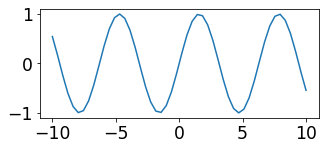

In [3]:
fig=plt.figure(figsize=(5,2))
ax=fig.add_subplot(1,1,1)
X=np.linspace(-10,10,50)
Y=np.sin(X)
ax.plot(X,Y)
plt.show()               

In [4]:
import matplotlib.offsetbox
props = dict(boxstyle='round',edgecolor="w",facecolor="w", alpha=0.5)

In [5]:
from datetime import datetime,date

In [6]:
#pip install fpdf
#from fpdf import FPDF

import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

In [7]:
today = date.today()
string_date=today.strftime("%Y-%m-%d")

In [8]:
string_date

'2022-04-06'

In [9]:
from iminuit import Minuit
import iminuit

In [10]:
iminuit.__version__

'2.2.0'

In [11]:
from astropy.io import fits
from spectractor import parameters
from spectractor.extractor.extractor import Spectractor
from spectractor.extractor.spectrum import Spectrum, detect_lines
from spectractor.extractor.spectrum import *
#from spectractor.extractor.spectroscopy import Lines, Line ,HALPHA, HBETA, O2_1, H2O_1,H2O_2
from spectractor.extractor.spectroscopy import Lines, Line ,HALPHA, HBETA, O2_1, H2O_1, ATMOSPHERIC_LINES
from spectractor.config import load_config
from spectractor import parameters
from spectractor.extractor.images import *
from scipy import ndimage, misc
from scipy.interpolate import interp1d

In [12]:
H2O_2 = Line(960, atmospheric=True, label=r'$H_2 O$', label_pos=[0.007, 0.02],width_bounds=[5, 30])  # libradtran paper fig.3, broad line

In [13]:
import requests
from requests.adapters import HTTPAdapter
from requests.packages.urllib3.util.retry import Retry

In [14]:
from time import sleep

In [15]:
from astropy.time import Time
import astropy.units as u

In [16]:
import pickle

# Function

In [17]:
def file_tag_forsorting(filename):
    # m=re.findall('^Cor_holo4_003_.*([0-9][0-9][0-9][0-9]-[0-9][0-9]-[0-9][0-9]_.*)[.]fits$',filename)
    m = re.findall('^exposure_.*([0-9][0-9][0-9][0-9][0-9])_postisrccd.*', filename)
    if len(m)>0:
        return m[0]
    else:
        return None


In [18]:
def subdir_tag_forsorting(subdir):
    # m=re.findall('^Cor_holo4_003_.*([0-9][0-9][0-9][0-9]-[0-9][0-9]-[0-9][0-9]_.*)[.]fits$',filename)
    m = re.findall('.*([0-9][0-9][0-9][0-9][0-9])$', subdir)
    if len(m)>0:
        return m[0]
    else:
        return None


In [19]:
file_tag_forsorting('exposure_2022031600330_postisrccd.fits')

'00330'

In [20]:
subdir_tag_forsorting('2022031600330')

'00330'

# Config

In [21]:
# path index for each month
DATE="20220317"

In [22]:
version="v5.0"

In [23]:
# Choose the config filename

list_of_spectractorconfigfiles= ["auxtel_configA.ini","auxtel_configB.ini","auxtel_configC.ini","auxtel_configD.ini","auxtel_configE.ini","auxtel_configF.ini","auxtel_configG.ini","auxtel_configHb.ini"]
config_idx =7
configfilename= os.path.join("./config",list_of_spectractorconfigfiles[config_idx])
configdir = (list_of_spectractorconfigfiles[config_idx].split("_")[-1]).split(".") [0]


In [24]:
configdir 

'configHb'

# Path

In [25]:
HOSTCC=True

In [26]:
# Set path depending on which computer running (according HOSTCC)
if HOSTCC:
    path_auxtel="/sps/lsst/groups/auxtel"
    path_spectractor=os.path.join(path_auxtel,"softs/github/desc/Spectractor")
    path_spectractor_config=os.path.join(path_spectractor,"config")
    path_images=os.path.join(path_auxtel,"data/2022/holo/"+DATE)
    path_output_spectractor=os.path.join(path_auxtel,"data/2022/OutputSpectractor/holo/"+configdir+"/"+DATE)
    
else:
    #path_auxtel="/Users/dagoret/DATA/AuxTelData2021"
    path_auxtel="/Users/sylvie/DATA/AuxTelDATA2022/2022"
    #path_spectractor=os.path.join(path_auxtel,"/users/dagoret/MacOSX/github/LSST/Spectractor")
    path_spectractor=os.path.join(path_auxtel,"/Users/sylvie/MacOSX/GitHub/LSST/Spectractor")
    path_spectractor_config=os.path.join(path_spectractor,"config")
    #path_images=os.path.join(path_auxtel,"holo/quickLookExp_v2/"+DATE)
    path_images=os.path.join(path_auxtel,"holo/"+DATE)
    path_output_spectractor=os.path.join(path_auxtel,"OutputSpectractor/holo/"+configdir+"/"+DATE)
    #path_output_spectractor=os.path.join(path_auxtel,"holo/OutputSpectractor/"+DATE)
    

In [27]:
path_output_spectractor

'/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configHb/20220317'

In [28]:
! ls -l $path_output_spectractor

total 0
drwxrws--- 1 dagoret lsst 2 Apr  4 17:54 2022031700237
drwxrws--- 1 dagoret lsst 2 Apr  4 20:16 2022031700238
drwxrws--- 1 dagoret lsst 2 Apr  5 17:25 2022031700244
drwxrws--- 1 dagoret lsst 2 Apr  5 17:25 2022031700245
drwxrws--- 1 dagoret lsst 2 Apr  5 17:25 2022031700251
drwxrws--- 1 dagoret lsst 2 Apr  5 17:25 2022031700252
drwxrws--- 1 dagoret lsst 2 Apr  5 17:25 2022031700258
drwxrws--- 1 dagoret lsst 2 Apr  5 17:25 2022031700259
drwxrws--- 1 dagoret lsst 2 Apr  5 17:25 2022031700265
drwxrws--- 1 dagoret lsst 2 Apr  5 17:25 2022031700266
drwxrws--- 1 dagoret lsst 2 Apr  5 17:25 2022031700272
drwxrws--- 1 dagoret lsst 2 Apr  5 17:25 2022031700273
drwxrws--- 1 dagoret lsst 2 Apr  5 17:25 2022031700279
drwxrws--- 1 dagoret lsst 2 Apr  5 17:25 2022031700280
drwxrws--- 1 dagoret lsst 2 Apr  5 17:25 2022031700286
drwxrws--- 1 dagoret lsst 2 Apr  5 17:25 2022031700287
drwxrws--- 1 dagoret lsst 2 Apr  5 17:25 2022031700293
drwxrws--- 1 dagoret lsst 2 Apr  5 17:25 2022031700294
dr

In [29]:
# standard configuration for spectractor
#config = os.path.join(path_spectractor_config,"auxtel.ini")
#config=os.path.join("./config",configfilename)
config=configfilename
print(f">>>>> Spectractor configuration filename : {configfilename}")

>>>>> Spectractor configuration filename : ./config/auxtel_configHb.ini


## Logbook for file selection

In [30]:
# Logbook for scan data
filename_logbook='logbooks/auxtelholologbook_'+DATE+'_'+ version+'.csv'

In [31]:
df=pd.read_csv(filename_logbook,index_col=0)

In [32]:
pd.set_option('display.max_rows', None)

In [33]:
df

index                     date  \
0       0  2022-03-18T00:51:03.112   
1       1  2022-03-18T00:51:36.190   
2       2  2022-03-18T00:54:30.463   
3       3  2022-03-18T00:55:03.377   
4       4  2022-03-18T00:58:01.707   
5       5  2022-03-18T00:58:34.835   
6       6  2022-03-18T01:01:32.859   
7       7  2022-03-18T01:02:05.775   
8       8  2022-03-18T01:05:03.839   
9       9  2022-03-18T01:05:36.766   
10     10  2022-03-18T01:08:32.232   
11     11  2022-03-18T01:09:05.133   
12     12  2022-03-18T01:12:00.164   
13     13  2022-03-18T01:12:33.079   
14     14  2022-03-18T01:15:32.735   
15     15  2022-03-18T01:16:05.627   
16     16  2022-03-18T01:18:59.663   
17     17  2022-03-18T01:19:32.577   
18     18  2022-03-18T01:22:30.386   
19     19  2022-03-18T01:23:03.286   
20     20  2022-03-18T01:43:39.078   
21     21  2022-03-18T01:44:11.982   
22     22  2022-03-18T01:47:06.515   
23     23  2022-03-18T01:47:39.407   
24     24  2022-03-18T01:50:33.593   
25     25  2022-03-18T01:51:06.516   
26     26  2022-03-18T01:54:00.883   
27     27  2022-03-18T01:54:33.856   
28     28  2022-03-18T01:57:30.505   
29     29  2022-03-18T01:58:03.446   
30     30  2022-03-18T02:01:00.181   
31     31  2022-03-18T02:01:33.339   
32     32  2022-03-18T02:04:30.946   
33     33  2022-03-18T02:05:03.843   
34     34  2022-03-18T02:08:03.232   
35     35  2022-03-18T02:08:36.262   
36     36  2022-03-18T02:11:34.200   
37     37  2022-03-18T02:12:07.156   
38     38  2022-03-18T02:15:00.952   
39     39  2022-03-18T02:15:33.886   
40     40  2022-03-18T02:33:14.260   
41     41  2022-03-18T02:33:47.167   
42     42  2022-03-18T02:36:45.029   
43     43  2022-03-18T02:37:17.962   
44     44  2022-03-18T02:40:14.985   
45     45  2022-03-18T02:40:47.930   
46     46  2022-03-18T02:43:46.361   
47     47  2022-03-18T02:44:19.255   
48     48  2022-03-18T02:47:16.976   
49     49  2022-03-18T02:47:49.912   
50     50  2022-03-18T02:50:52.460   
51     51  2022-03-18T02:51:25.626   
52     52  2022-03-18T03:08:55.717   
53     53  2022-03-18T03:09:28.629   
54     54  2022-03-18T03:13:08.467   
55     55  2022-03-18T03:13:41.360   
56     56  2022-03-18T03:17:20.920   
57     57  2022-03-18T03:17:53.934   
58     58  2022-03-18T03:21:41.018   
59     59  2022-03-18T03:22:14.022   

                                               path  \
0   /sps/lsst/groups/auxtel/data/2022/holo/20220317   
1   /sps/lsst/groups/auxtel/data/2022/holo/20220317   
2   /sps/lsst/groups/auxtel/data/2022/holo/20220317   
3   /sps/lsst/groups/auxtel/data/2022/holo/20220317   
4   /sps/lsst/groups/auxtel/data/2022/holo/20220317   
5   /sps/lsst/groups/auxtel/data/2022/holo/20220317   
6   /sps/lsst/groups/auxtel/data/2022/holo/20220317   
7   /sps/lsst/groups/auxtel/data/2022/holo/20220317   
8   /sps/lsst/groups/auxtel/data/2022/holo/20220317   
9   /sps/lsst/groups/auxtel/data/2022/holo/20220317   
10  /sps/lsst/groups/auxtel/data/2022/holo/20220317   
11  /sps/lsst/groups/auxtel/data/2022/holo/20220317   
12  /sps/lsst/groups/auxtel/data/2022/holo/20220317   
13  /sps/lsst/groups/auxtel/data/2022/holo/20220317   
14  /sps/lsst/groups/auxtel/data/2022/holo/20220317   
15  /sps/lsst/groups/auxtel/data/2022/holo/20220317   
16  /sps/lsst/groups/auxtel/data/2022/holo/20220317   
17  /sps/lsst/groups/auxtel/data/2022/holo/20220317   
18  /sps/lsst/groups/auxtel/data/2022/holo/20220317   
19  /sps/lsst/groups/auxtel/data/2022/holo/20220317   
20  /sps/lsst/groups/auxtel/data/2022/holo/20220317   
21  /sps/lsst/groups/auxtel/data/2022/holo/20220317   
22  /sps/lsst/groups/auxtel/data/2022/holo/20220317   
23  /sps/lsst/groups/auxtel/data/2022/holo/20220317   
24  /sps/lsst/groups/auxtel/data/2022/holo/20220317   
25  /sps/lsst/groups/auxtel/data/2022/holo/20220317   
26  /sps/lsst/groups/auxtel/data/2022/holo/20220317   
27  /sps/lsst/groups/auxtel/data/2022/holo/20220317   
28  /sps/lsst/groups/auxtel/data/2022/holo/20220317   
29  /sps/lsst/groups/auxtel/data/20

## Selection of input files

In [34]:
# Do not consider flag
#df_good=df[df["quality"]==1]

In [35]:
df_good=df
df_good["quality"] = 1

In [36]:
for spectra_file in df_good["file"]:
    print(spectra_file)

exposure_2022031700237_postisrccd.fits
exposure_2022031700238_postisrccd.fits
exposure_2022031700244_postisrccd.fits
exposure_2022031700245_postisrccd.fits
exposure_2022031700251_postisrccd.fits
exposure_2022031700252_postisrccd.fits
exposure_2022031700258_postisrccd.fits
exposure_2022031700259_postisrccd.fits
exposure_2022031700265_postisrccd.fits
exposure_2022031700266_postisrccd.fits
exposure_2022031700272_postisrccd.fits
exposure_2022031700273_postisrccd.fits
exposure_2022031700279_postisrccd.fits
exposure_2022031700280_postisrccd.fits
exposure_2022031700286_postisrccd.fits
exposure_2022031700287_postisrccd.fits
exposure_2022031700293_postisrccd.fits
exposure_2022031700294_postisrccd.fits
exposure_2022031700300_postisrccd.fits
exposure_2022031700301_postisrccd.fits
exposure_2022031700309_postisrccd.fits
exposure_2022031700310_postisrccd.fits
exposure_2022031700316_postisrccd.fits
exposure_2022031700317_postisrccd.fits
exposure_2022031700323_postisrccd.fits
exposure_2022031700324_po

## Selection of Spectractor output files

In [37]:
# total number of exposures
NBEXP=0
# total number of exposures without dir
NBEXPNODIR=0
# total number of exposures with dir
NBEXPWTHDIR=0
# total number of exposures with plots
NBEXPWTHPLT=0
# total number of exposures with spectra
NBEXPWTHSPEC=0

# list of exposures
LISTNUM=[]
# list of exposure without dir (not run spectraction)
LISTNUMNODIR=[]
# list of exposure with dir (spectraction has been run)
LISTNUMWTHDIR=[]
# list of exposures with plots (Spectractor has run up to some point)
LISTNUMWTHPLOTS=[]
# list of exposures with spectraction output (Spectractor has completed)
LISTNUMWTHSPECTR=[]

# list of selected spectra path
List_of_spectra_path=[]

In [38]:
list_of_files=os.listdir(path_output_spectractor)
list_of_files=sorted(list_of_files)


print("list of subdir found ",list_of_files)

for subdir in list_of_files:
    
    
    #tag = file_tag_forsorting(subdir)
    tag = subdir_tag_forsorting(subdir)
    
        
    print(tag)    
    #if tag is not None and int(tag)<317:
    #    continue
    if tag is None :
        continue
  
    
    
    fulldir=os.path.join(path_output_spectractor,subdir)



    if not os.path.isdir(fulldir):
        
        print("---------------------------------------------")
        print(subdir," \t  ",tag)
        print("{} is not a directory".format(subdir))
        

        NBEXPNODIR+=1


    else:

        
        print("---------------------------------------------")
        print(subdir," \t  ",tag)
        print("{} is a directory".format(subdir))

        tagname=subdir_tag_forsorting(subdir)
        print("tagname= {}".format(tagname))
        #targetname=file_target(subdir)
        #print("targetname= {}".format(targetname))
        



        NBEXP += 1
        LISTNUM.append(tagname)



        dir_plots=os.path.join(fulldir,"plots")
        dir_spectration = os.path.join(fulldir, "basespec")

        flag_empty1 = True
        flag_empty2 = True


        if os.path.isdir(dir_plots):
            if any(os.scandir(dir_plots)):
                print("dir_plots is not empty")
                NBEXPWTHPLT+=1
                LISTNUMWTHPLOTS.append(tagname)
                flag_empty1 = False

            else:
                print("dir_plots is empty")


        if os.path.isdir(dir_spectration):
            if any(os.scandir(dir_spectration)):
                print("dir_spectration is not empty")
                NBEXPWTHSPEC+=1
                LISTNUMWTHSPECTR.append(tagname)
                flag_empty2 = False
                List_of_spectra_path.append(dir_spectration)

            else:
                print("dir_spectration is empty")

        if flag_empty1 and flag_empty2 :
            NBEXPNODIR+=1
            LISTNUMNODIR.append(tagname)
        else:
            NBEXPWTHDIR += 1
            LISTNUMWTHDIR.append(tagname)



print("-----------------------------------------------------------------")


#LISTNUM=sorted(LISTNUM)
#LISTNUMNODIR=sorted(LISTNUMNODIR)
#LISTNUMWTHDIR=sorted(LISTNUMWTHDIR)
#LISTNUMWTHPLOTS=sorted(LISTNUMWTHPLOTS)
#LISTNUMWTHSPECTR=sorted(LISTNUMWTHSPECTR)
List_of_spectra_path=sorted(List_of_spectra_path)

print("Full list of Exposures : .......................{}".format(LISTNUM))
print("Full list of Exposures without output dir: .....{}".format(LISTNUMNODIR))
print("Full list of Exposures with output dir: ....... {}".format(LISTNUMWTHDIR))
print("Full list of Exposures with output plots: ..... {}".format(LISTNUMWTHPLOTS))
print("Full list of Exposures with output spectra: ....{}".format(LISTNUMWTHSPECTR))




print("Total number of exposures : .....................{}".format(NBEXP))
print("Total number of exposures without dir : .........{}".format(NBEXPNODIR))
print("Total number of exposures with dir :.............{}".format(NBEXPWTHDIR))
print("Total number of exposures with plots : ..........{}".format(NBEXPWTHPLT))
print("Total number of exposures with spectra: .........{}".format(NBEXPWTHSPEC))


list of subdir found  ['2022031700237', '2022031700238', '2022031700244', '2022031700245', '2022031700251', '2022031700252', '2022031700258', '2022031700259', '2022031700265', '2022031700266', '2022031700272', '2022031700273', '2022031700279', '2022031700280', '2022031700286', '2022031700287', '2022031700293', '2022031700294', '2022031700300', '2022031700301', '2022031700309', '2022031700310', '2022031700316', '2022031700317', '2022031700323', '2022031700324', '2022031700330', '2022031700331', '2022031700337', '2022031700338', '2022031700344', '2022031700345', '2022031700351', '2022031700352', '2022031700358', '2022031700359', '2022031700365', '2022031700366', '2022031700372', '2022031700373', '2022031700379', '2022031700380', '2022031700386', '2022031700387', '2022031700393', '2022031700394', '2022031700400', '2022031700401', '2022031700407', '2022031700408', '2022031700414', '2022031700415', '2022031700421', '2022031700422', '2022031700428', '2022031700429', '2022031700435', '2022031

In [39]:
#dir_spectra="outputs_reprocess"
print(List_of_spectra_path)

['/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configHb/20220317/2022031700238/basespec', '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configHb/20220317/2022031700244/basespec', '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configHb/20220317/2022031700245/basespec', '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configHb/20220317/2022031700251/basespec', '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configHb/20220317/2022031700252/basespec', '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configHb/20220317/2022031700265/basespec', '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configHb/20220317/2022031700272/basespec', '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configHb/20220317/2022031700273/basespec', '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configHb/20220317/2022031700279/basespec', '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configHb/20220317/2022031700286/

In [40]:
config

'./config/auxtel_configHb.ini'

## Extraction of spectra

In [41]:
all_files_spectra = []
all_files_spectrogram = []
all_files_lines = []
all_files_table = []

# loop on topdir
for dir_spectra in List_of_spectra_path:
    for filename in os.listdir(dir_spectra):
        if re.search("_spectrum.fits$",filename):
            the_file_spectrum=os.path.join(dir_spectra,filename)
            all_files_spectra.append(the_file_spectrum)
            the_file_spectrogram=the_file_spectrum.replace("_spectrum","_spectrogram")
            all_files_spectrogram.append(the_file_spectrogram)
            the_file_lines=the_file_spectrum.replace("_spectrum.fits","_lines.csv")
            all_files_lines.append(the_file_lines)
            the_file_table=the_file_spectrum.replace("_spectrum.fits","_table.csv")
            all_files_table.append(the_file_table)
    

In [42]:
all_files_spectra[:3]

['/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configHb/20220317/2022031700238/basespec/exposure_2022031700238_postisrccd_spectrum.fits',
 '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configHb/20220317/2022031700244/basespec/exposure_2022031700244_postisrccd_spectrum.fits',
 '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configHb/20220317/2022031700245/basespec/exposure_2022031700245_postisrccd_spectrum.fits']

In [43]:
all_files_spectrogram[:3]

['/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configHb/20220317/2022031700238/basespec/exposure_2022031700238_postisrccd_spectrogram.fits',
 '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configHb/20220317/2022031700244/basespec/exposure_2022031700244_postisrccd_spectrogram.fits',
 '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configHb/20220317/2022031700245/basespec/exposure_2022031700245_postisrccd_spectrogram.fits']

In [44]:
all_files_lines[:3]

['/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configHb/20220317/2022031700238/basespec/exposure_2022031700238_postisrccd_lines.csv',
 '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configHb/20220317/2022031700244/basespec/exposure_2022031700244_postisrccd_lines.csv',
 '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configHb/20220317/2022031700245/basespec/exposure_2022031700245_postisrccd_lines.csv']

In [45]:
all_files_table[:3] 

['/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configHb/20220317/2022031700238/basespec/exposure_2022031700238_postisrccd_table.csv',
 '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configHb/20220317/2022031700244/basespec/exposure_2022031700244_postisrccd_table.csv',
 '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configHb/20220317/2022031700245/basespec/exposure_2022031700245_postisrccd_table.csv']

## Selection of good spectra

In [46]:
all_good_spectra_spectrum_files = sorted(all_files_spectra)

In [47]:
N=len(all_good_spectra_spectrum_files)

# wavelength bin colors
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=N)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange(N), alpha=1)

## All Spectra

0 ) exposure_2022031700238_postisrccd_spectrum.fits   /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configHb/20220317/2022031700238/basespec/exposure_2022031700238_postisrccd_spectrum.fits
set date_obs to 2022-03-18T00:51:22.049
set expo to 20.0
set airmass to 1.11557476948966
set disperser_label to holo4_003
set units to erg/s/cm$^2$/nm
set rotation_angle to 0.1753951396614214
set dec to -32.3064444444444
set hour_angle to 30.8762989508295
set temperature to 8.9
set pressure to 743.45
set humidity to 48.0
set lambda_ref to 626.6801216985461
set parallactic_angle to 93.8012496664173


/sps/lsst/groups/auxtel/softs/utils/anaconda3/lib/python3.8/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/sps/lsst/groups/auxtel/softs/utils/anaconda3/lib/python3.8/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


target_name = mu.col, Selected object name for Simbad : mu. Col
 MAIN_ID        RA           DEC      ...  Z_VALUE  SCRIPT_NUMBER_ID
             "h:m:s"       "d:m:s"    ...                           
--------- ------------- ------------- ... --------- ----------------
* mu. Col 05 45 59.8950 -32 18 23.162 ... 0.0003640                1
1 ) exposure_2022031700244_postisrccd_spectrum.fits   /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configHb/20220317/2022031700244/basespec/exposure_2022031700244_postisrccd_spectrum.fits
set date_obs to 2022-03-18T00:54:16.312
set expo to 20.0
set airmass to 1.121576965054115
set disperser_label to holo4_003
set units to erg/s/cm$^2$/nm
set rotation_angle to 0.1741806116248446
set dec to -32.3064444444444
set hour_angle to 31.60492174100415
set temperature to 8.9
set pressure to 743.45
set humidity to 49.0
set lambda_ref to 626.883564656571
set parallactic_angle to 94.10618686949074
target_name = mu.col, Selected object name for Simbad : m

/tmp/ipykernel_2047/3127726432.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig=plt.figure(figsize=(16,4))


set date_obs to 2022-03-18T02:04:16.794
set expo to 20.0
set airmass to 1.33727547076682
set disperser_label to holo4_003
set units to erg/s/cm$^2$/nm
set rotation_angle to 0.1388486262435704
set dec to -32.3064444444444
set hour_angle to 49.15879882143194
set temperature to 8.5
set pressure to 743.45
set humidity to 58.0
set lambda_ref to 628.5424256920012
set parallactic_angle to 100.7251843777299
target_name = mu.col, Selected object name for Simbad : mu. Col
 MAIN_ID        RA           DEC      ... Z_VALUE_21 SCRIPT_NUMBER_ID
             "h:m:s"       "d:m:s"    ...                            
--------- ------------- ------------- ... ---------- ----------------
* mu. Col 05 45 59.8950 -32 18 23.162 ...  0.0003640                1
21 ) exposure_2022031700352_postisrccd_spectrum.fits   /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configHb/20220317/2022031700352/basespec/exposure_2022031700352_postisrccd_spectrum.fits
set date_obs to 2022-03-18T02:04:49.712
set expo to 

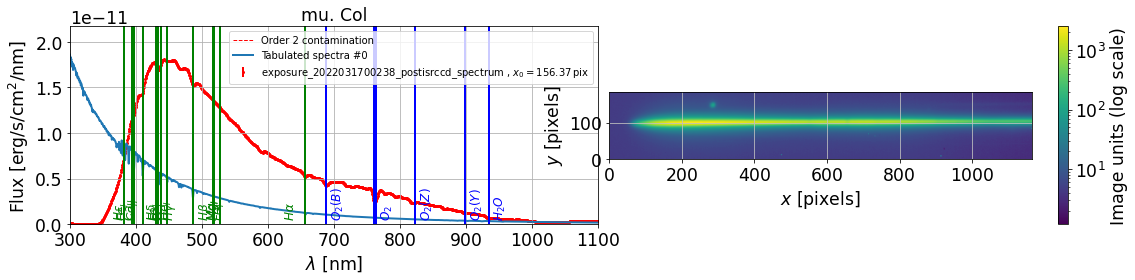

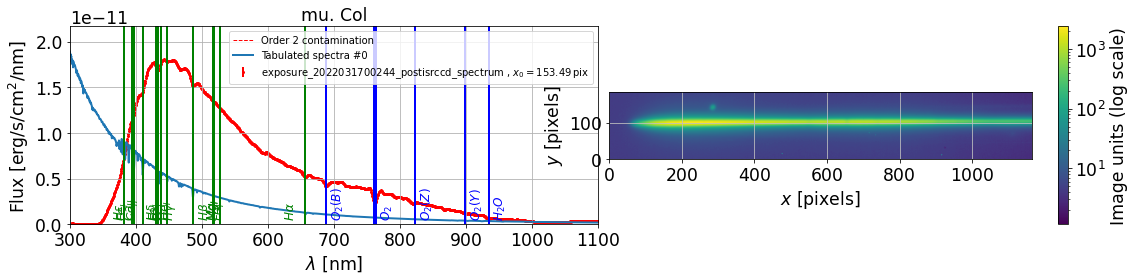

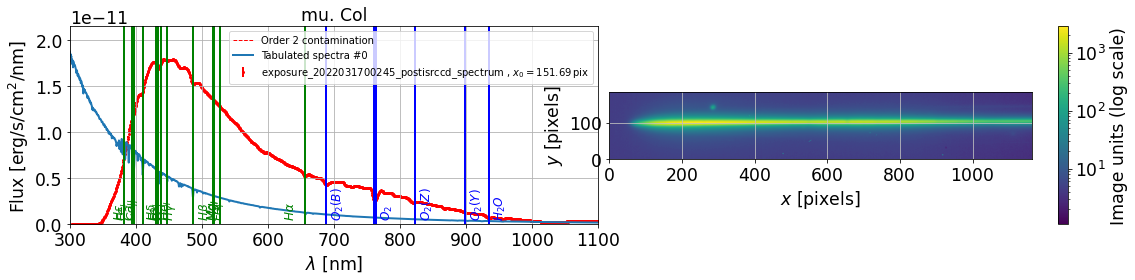

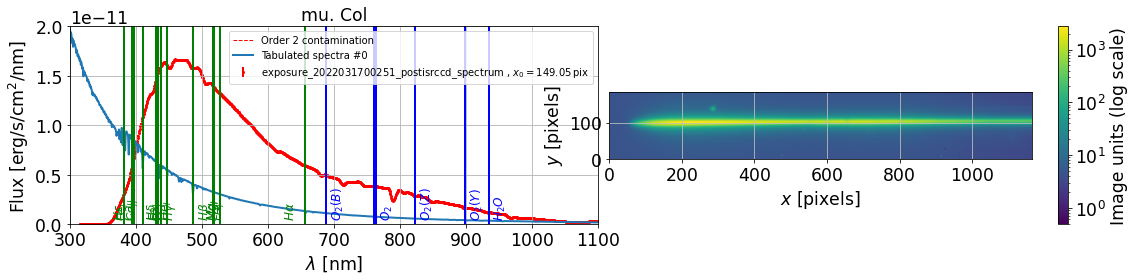

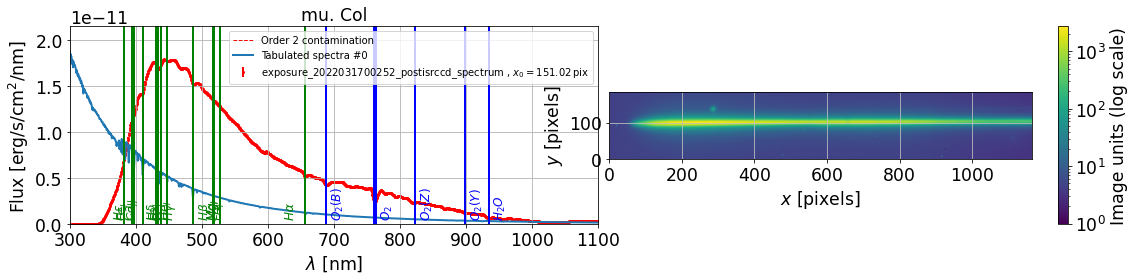

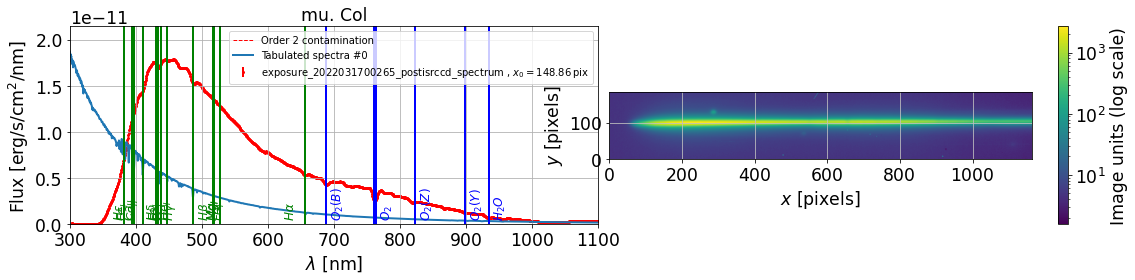

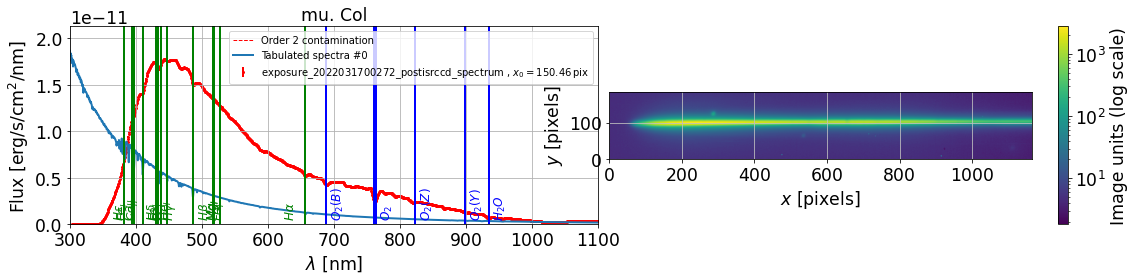

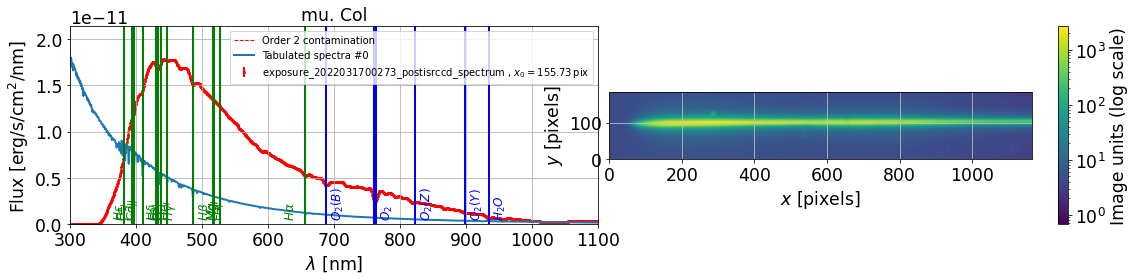

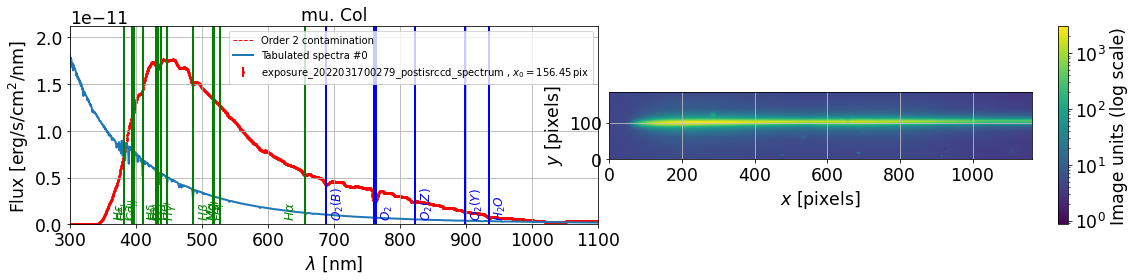

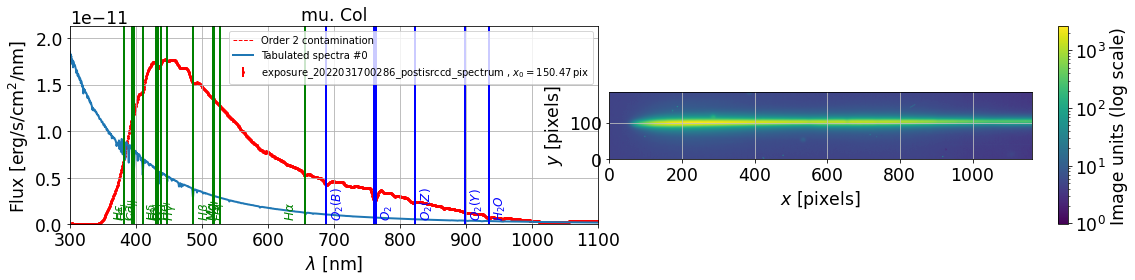

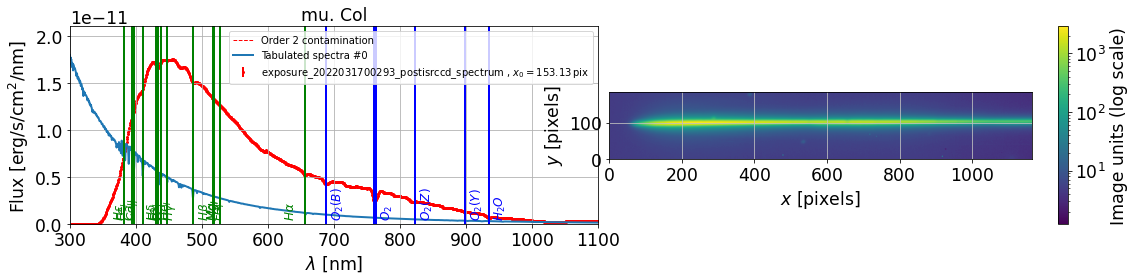

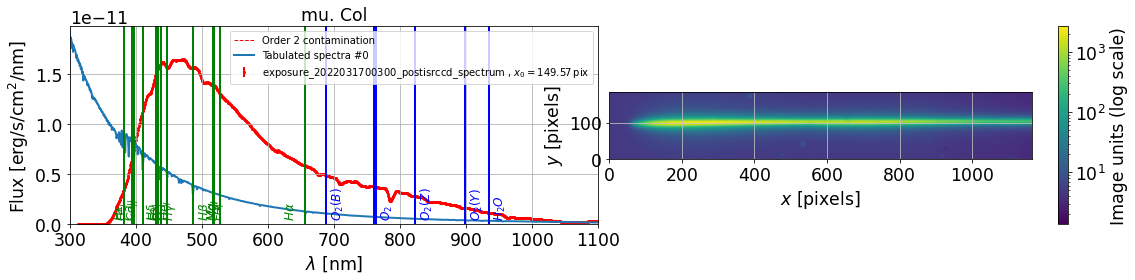

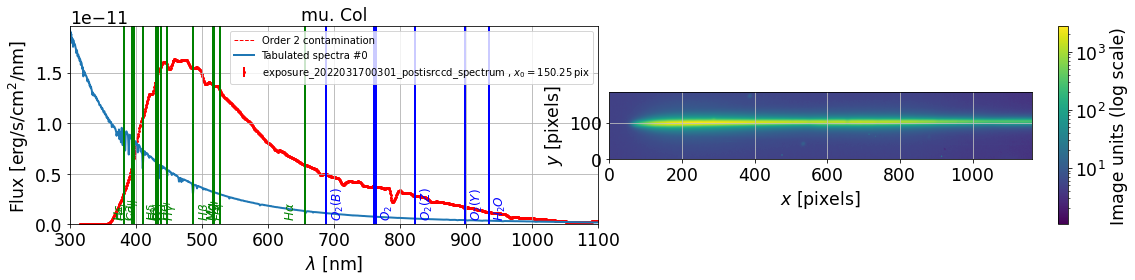

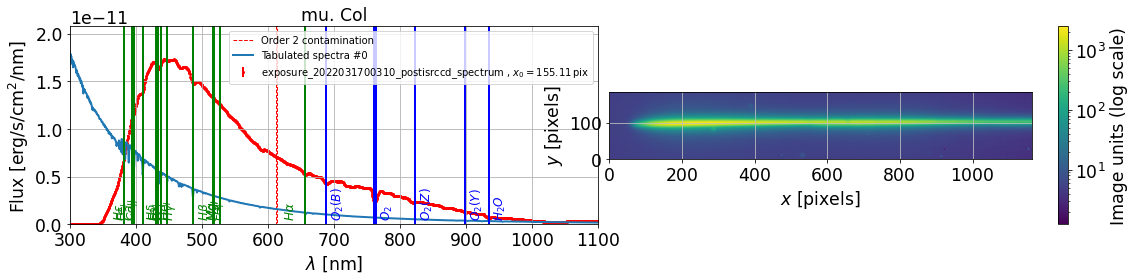

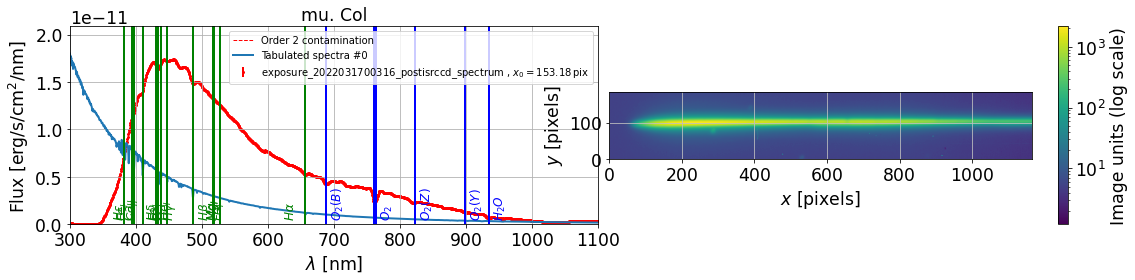

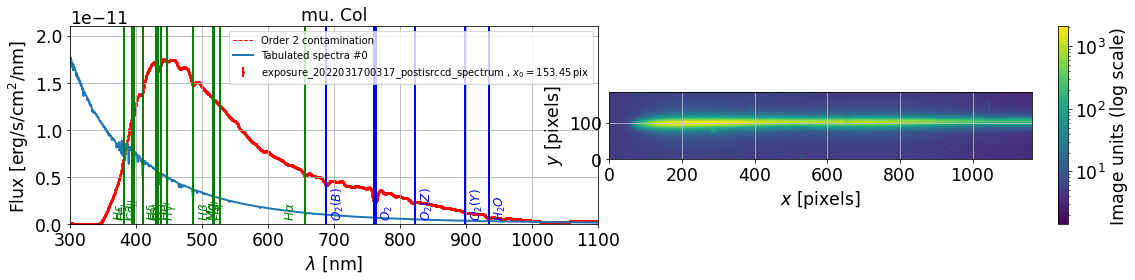

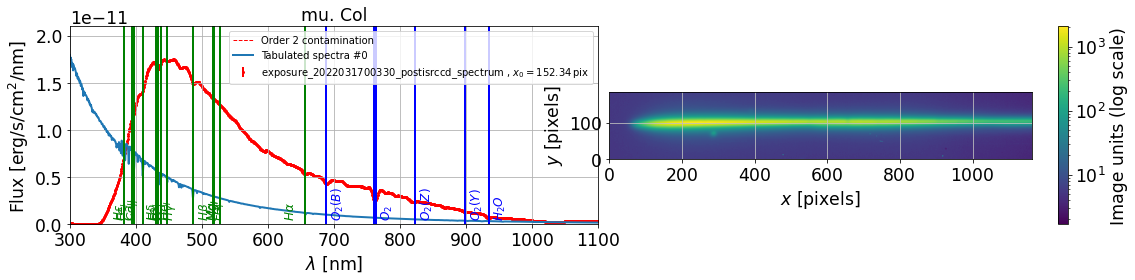

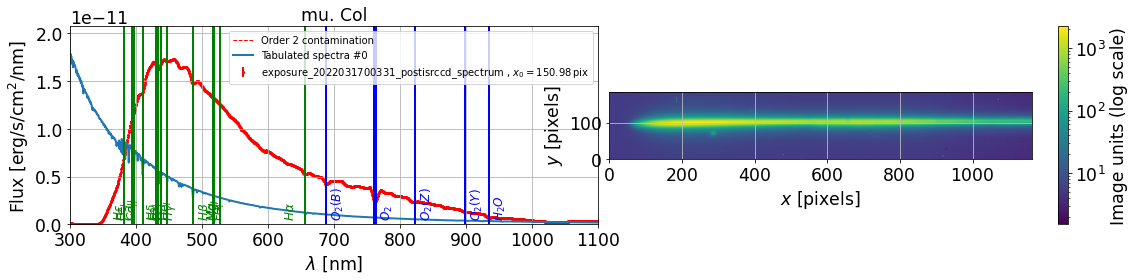

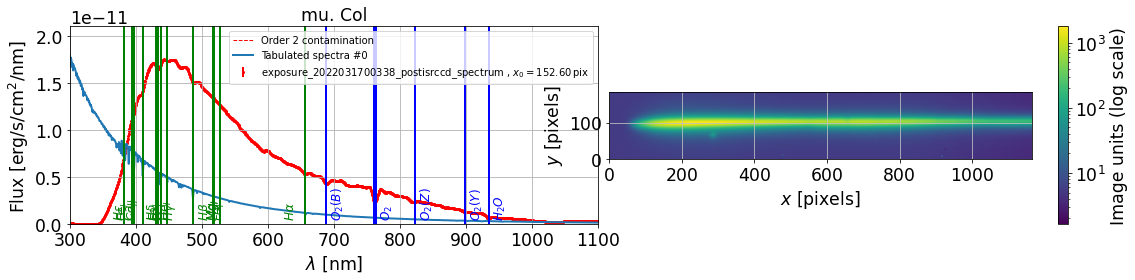

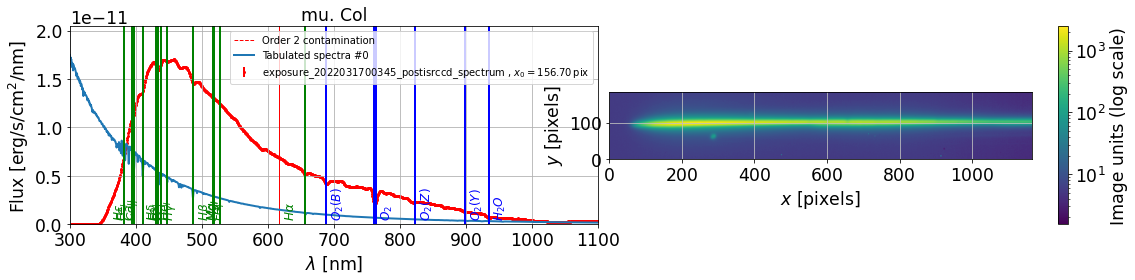

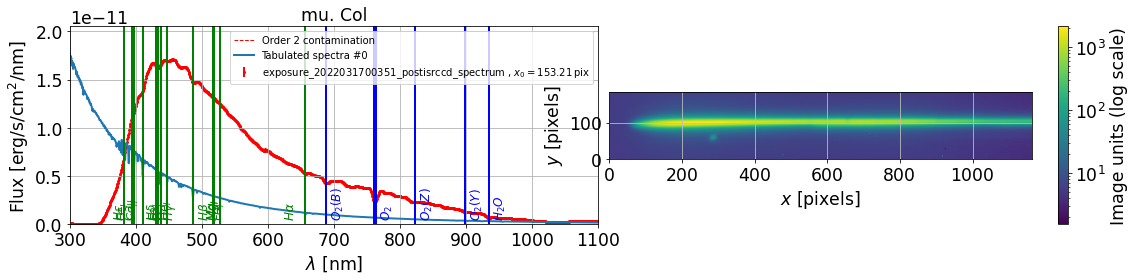

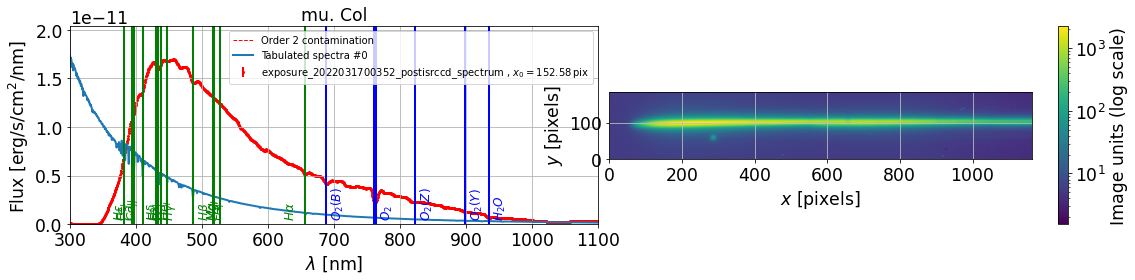

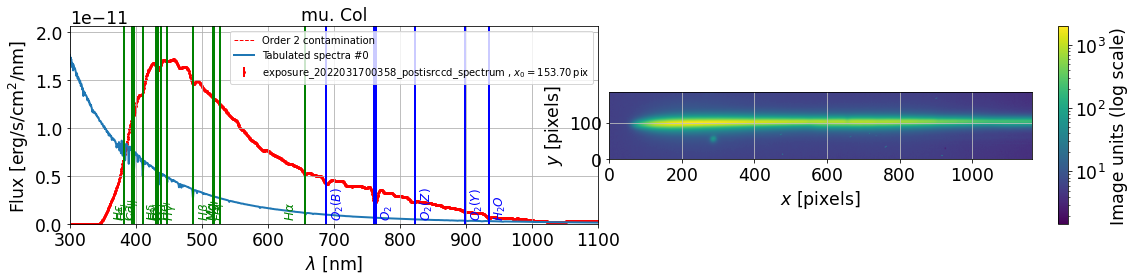

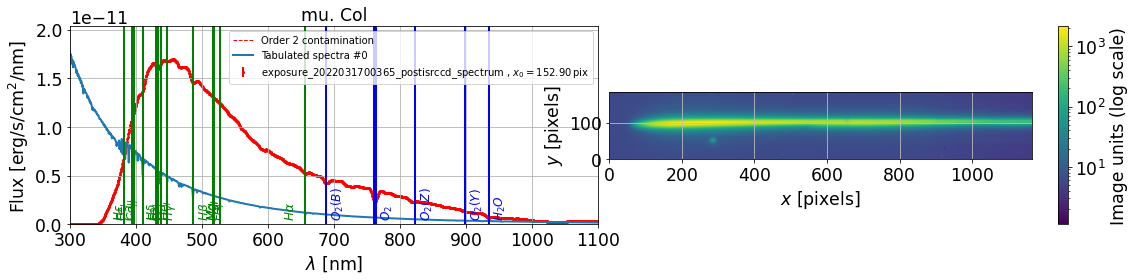

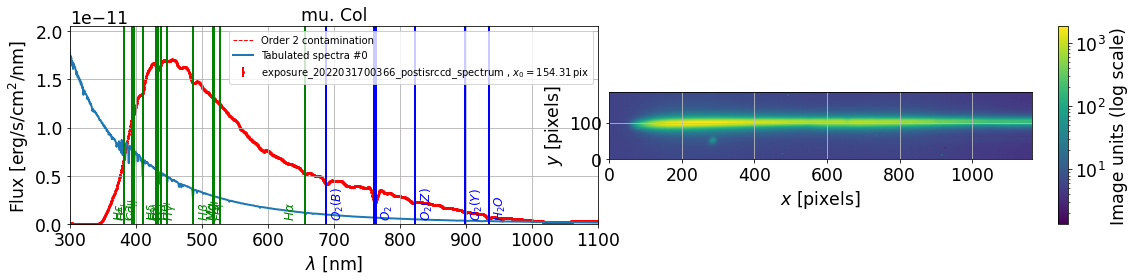

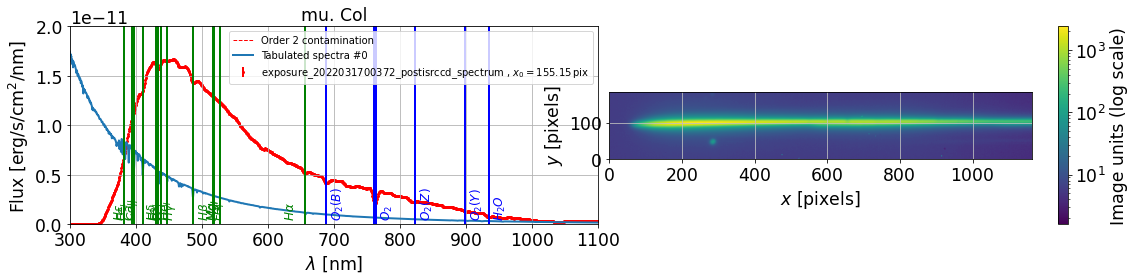

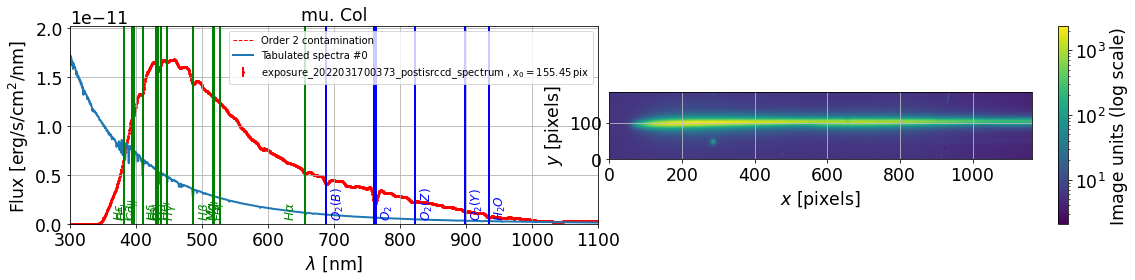

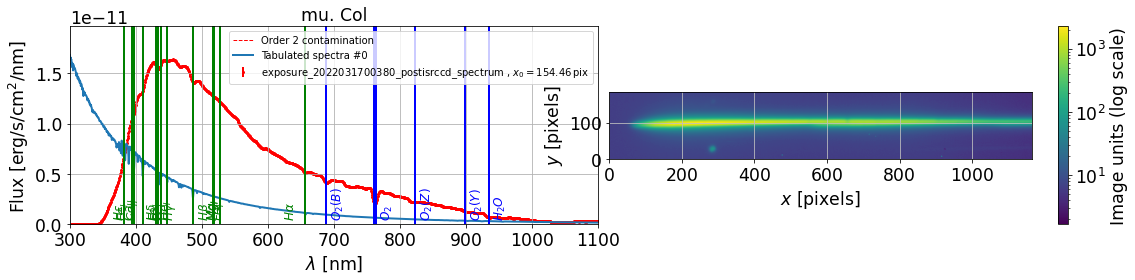

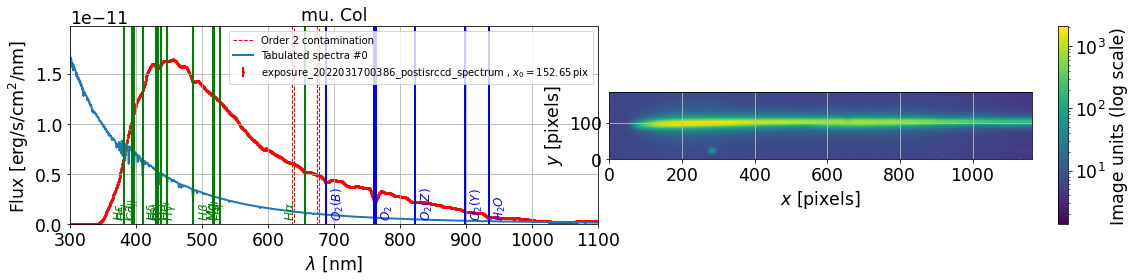

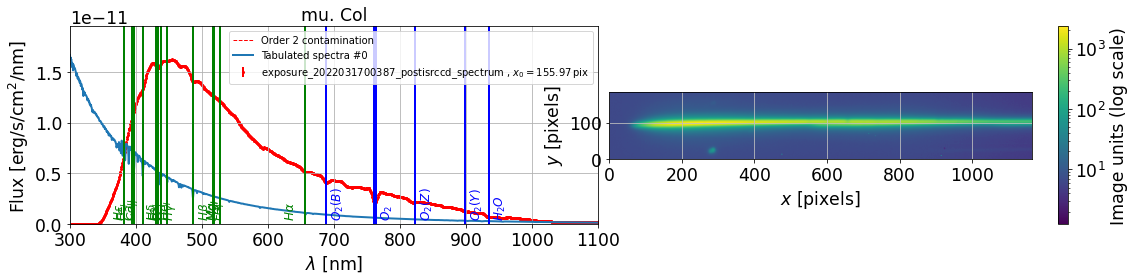

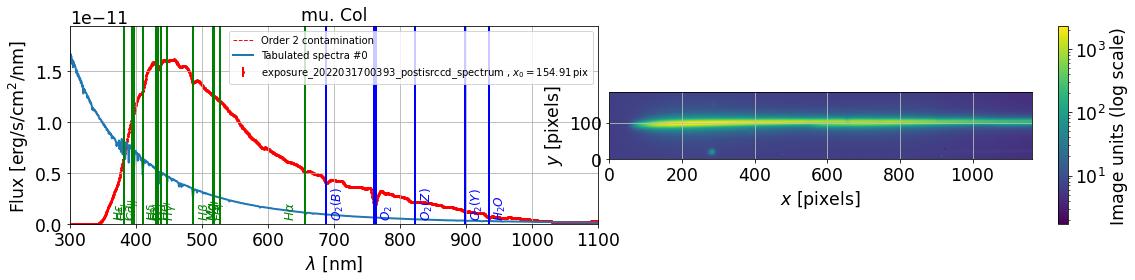

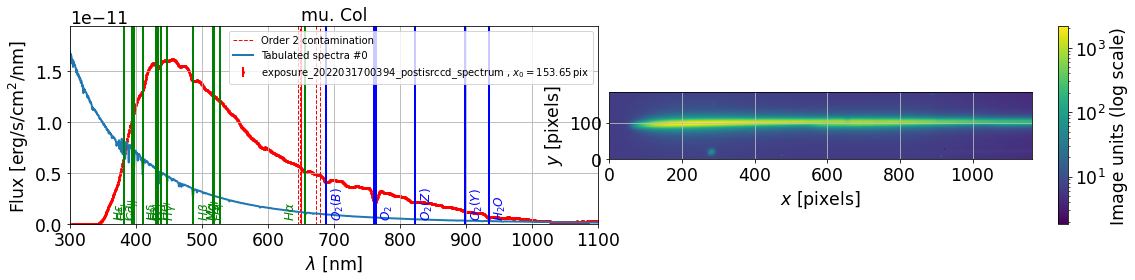

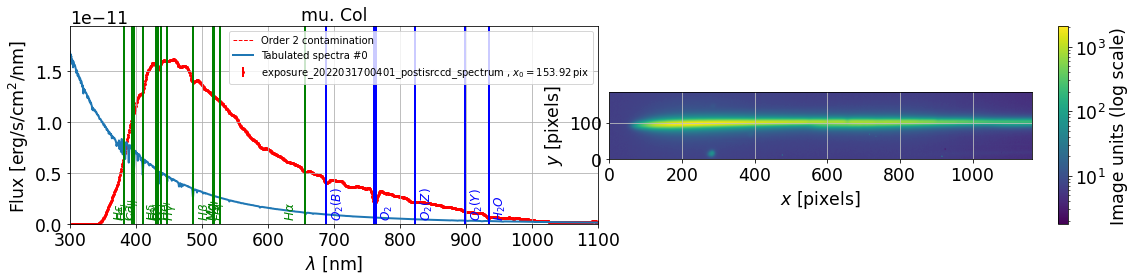

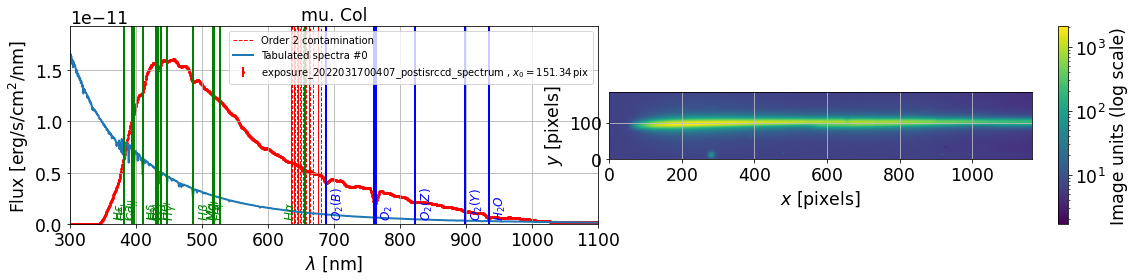

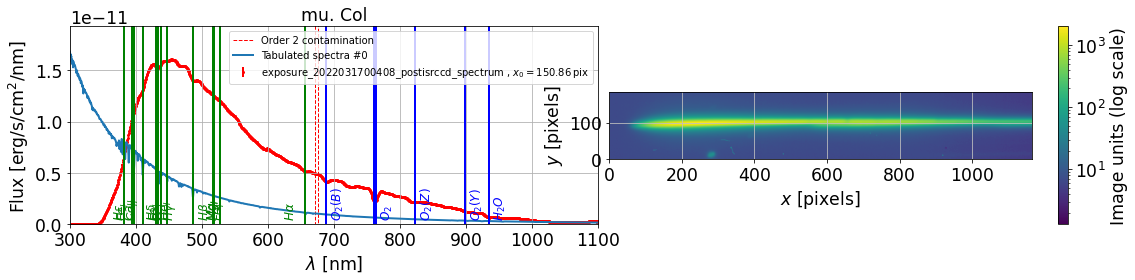

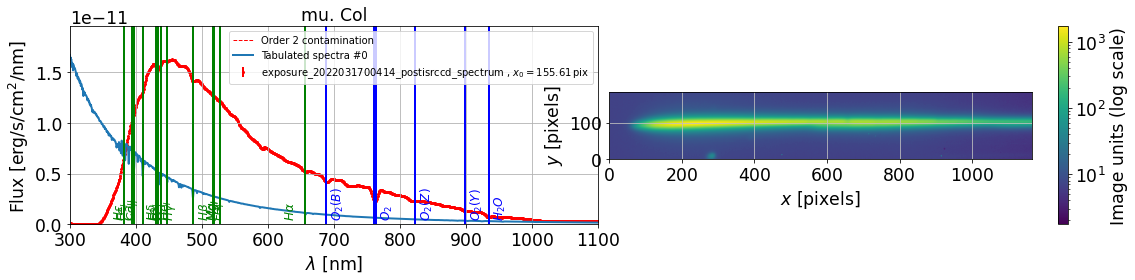

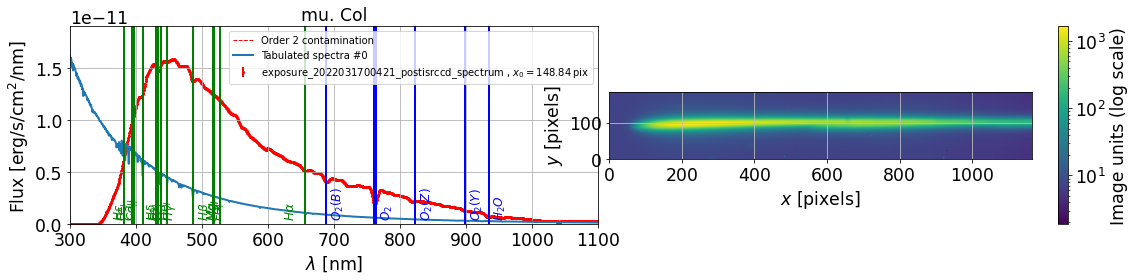

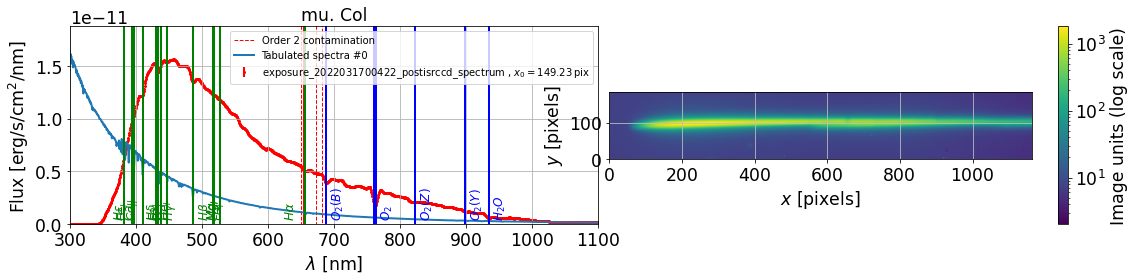

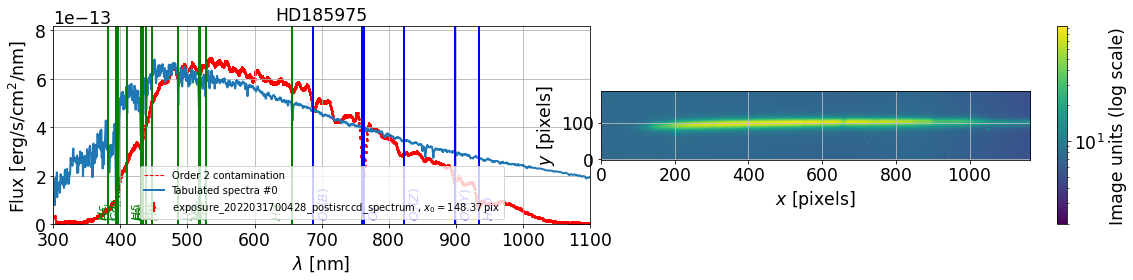

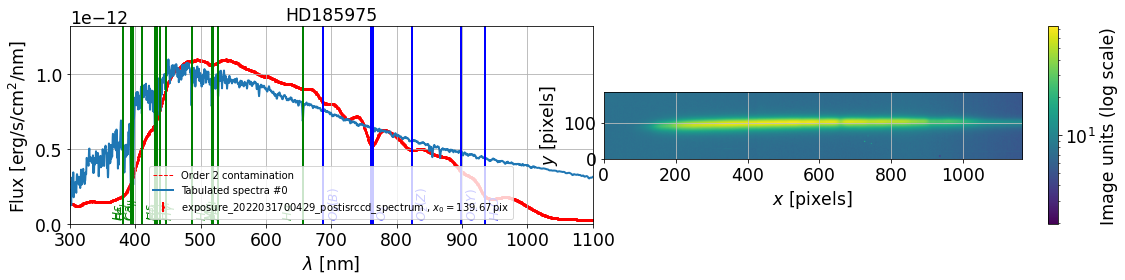

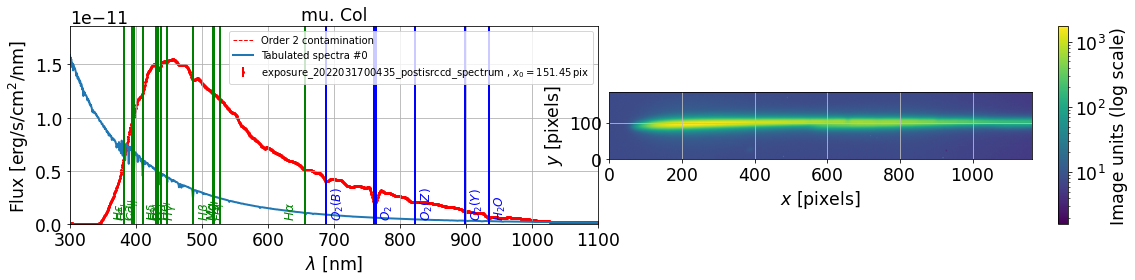

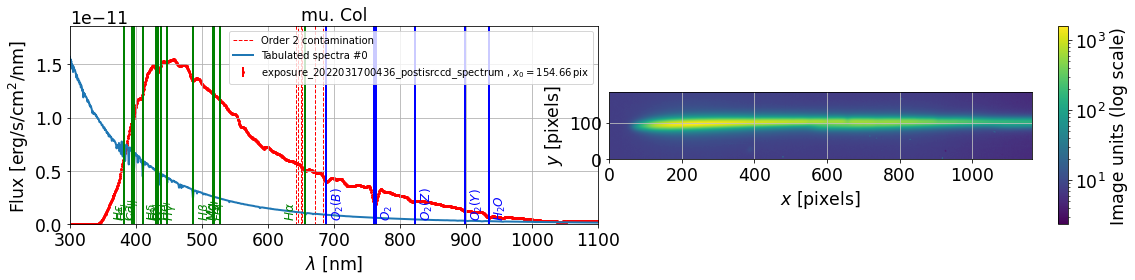

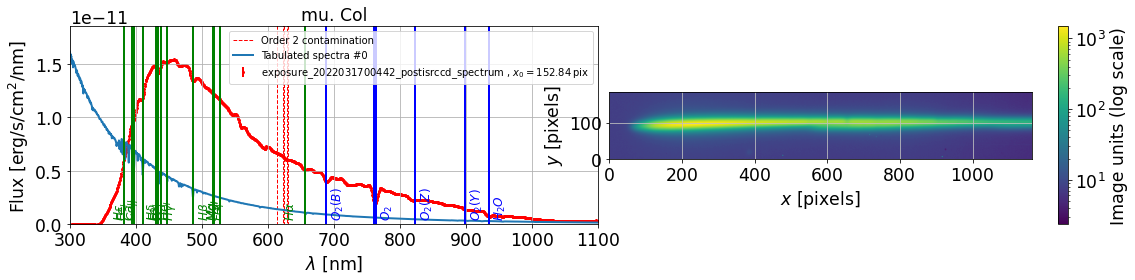

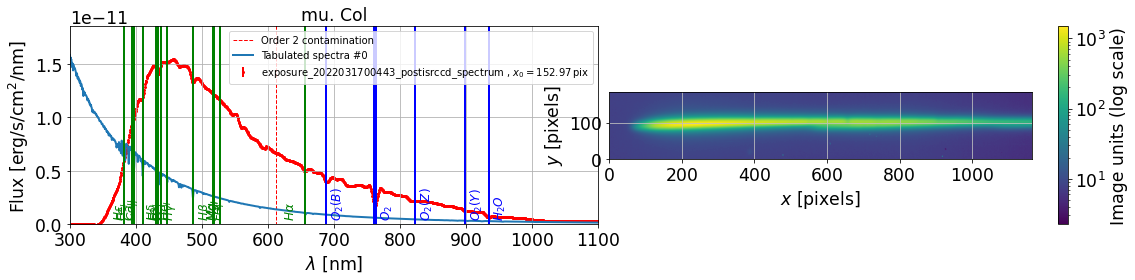

In [48]:
parameters.DISPLAY=True

FLAG_ORDER2 = True

infos = []
all_lambdas=[]
all_data=[]
all_data_err=[]

if FLAG_ORDER2:
    all_lambdas_order2=[]
    all_data_order2=[]
    all_data_err_order2=[]

all_num=[]
all_figs = []


idx=0
for fullfilename in all_good_spectra_spectrum_files:
    
    filename = os.path.basename(fullfilename)
    print(idx,")",filename," ",fullfilename)
    
    
    fig=plt.figure(figsize=(16,4))
    ax1 = fig.add_subplot(1, 2, 1)
    
    filename= os.path.basename(fullfilename)
    tag=file_tag_forsorting(filename.split(".")[0])
    all_num.append(tag)
    
   
     
    s=Spectrum(fullfilename, config=config,fast_load=False)
    label=filename.split('.')[0]+" "
    s.plot_spectrum(ax=ax1,force_lines=True,label=label)
    
    all_lambdas.append(s.lambdas)
    all_data.append(s.data)
    all_data_err.append(s.err)
    
    if FLAG_ORDER2:
        all_lambdas_order2.append(s.lambdas_order2)
        all_data_order2.append(s.data_order2)
        all_data_err_order2.append(s.err_order2)
    
    ax2 = fig.add_subplot(1, 2, 2)
    
    fullfilename2=all_files_spectrogram[idx]
    
    s.load_spectrogram(fullfilename2)
    s.plot_spectrogram(ax=ax2,scale="log")
    
    
    infos.append([idx,s.target.label,s.date_obs,s.airmass,s.temperature,s.pressure,s.humidity])
    
    
    plt.show()
    all_figs.append(fig)
    
    idx+=1
    

## Save figures in a pdf filename

In [49]:
def SaveFigSpectraInPdf(nbspecperpage=5):
    
    Nspec= len(all_good_spectra_spectrum_files)
    Nbpages = np.ceil(Nspec/nbspecperpage)
    idx_inpage = nbspecperpage
    idx_pagenum = 0
    idx = 0
    
    all_composed_figs = []
    
    for fullfilename in all_good_spectra_spectrum_files:
        
        if idx_inpage == nbspecperpage:
            idx_inpage = 1
            idx_pagenum += 1
            
            if idx_pagenum > 1:
                all_composed_figs.append(fig)
            
            # create a new figure 
            fig=plt.figure(figsize=(16,20))
        else:
            idx_inpage += 1   
                             
        idx_fig = 2*(idx_inpage-1)+1
        
        print(f"\t \t  SaveFigSpectraInPdf >>>>>>>>  spec num = {idx}, pagenum = {idx_pagenum}/{Nbpages}, idx_inpage = {idx_inpage}, idx_fig = {idx_fig}")        
       
        
    
        filename = os.path.basename(fullfilename)
        

        ax1 = fig.add_subplot(nbspecperpage, 2, idx_fig)
    
        filename= os.path.basename(fullfilename)
        tag=file_tag_forsorting(filename.split(".")[0])
     
     
        s=Spectrum(fullfilename, config=config,fast_load=False);
        label=filename.split('.')[0]+" "
        s.plot_spectrum(ax=ax1,force_lines=True,label=label)
    
    
        ax2 = fig.add_subplot(nbspecperpage, 2, idx_fig+1)
    
        fullfilename2=all_files_spectrogram[idx]
    
        s.load_spectrogram(fullfilename2)
        s.plot_spectrogram(ax=ax2,scale="log")
    
        plt.show()
                           
        idx+=1
                           
        if idx == Nspec:
             all_composed_figs.append(fig)
                           
    return  all_composed_figs
    


In [50]:
def SaveFigSpectraSummaryInPdf(all_wl,all_spec,all_tag,delta=0, 
                thetitle="Hologram, spectrum night 2022-03-16", 
                thexlabel="$\\lambda$ (nm)",theylabel="Flux (erg/cm^2/s/nm)",figsize=(14,8)):
    """
    """
    
    
    
    
    NN=len(all_wl)
    
    # wavelength bin colors
    jet = plt.get_cmap('jet')
    cNorm = colors.Normalize(vmin=0, vmax=NN)
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
    all_colors = scalarMap.to_rgba(np.arange(NN), alpha=1)
    
    
    fig=plt.figure(figsize=figsize)
    ax=fig.add_subplot(1,1,1)
    
    idx=0
    for idx in range(NN):
        
        label=all_tag[idx]
        ax.plot(all_wl[idx],all_spec[idx]+delta,label=label,color=all_colors[idx])
        if delta !=0:
            plt.text(250.,all_spec[idx][0]+delta, f'{label}',color=all_colors[idx],fontsize=10)
        
    ax.set_xlabel(thexlabel)
    ax.set_ylabel(theylabel)
    ax.set_xlim(250.,1100)
    ax.grid()
    ax.legend(bbox_to_anchor=(1.04, 1), prop={'size': 10}, loc='upper left')
    ax.set_title(thetitle)
    plt.show()
    return fig

In [51]:
def SaveFigSpectraSummaryBothInPdf(all_wl,all_spec,all_tag,delta=0, 
                thetitle="Hologram, spectrum", 
                thexlabel="$\\lambda$ (nm)",theylabel="Flux (erg/cm^2/s/nm)",figsize=(12,20)):
    """
    
    """
    
    NN=len(all_wl)
    
    # wavelength bin colors
    jet = plt.get_cmap('jet')
    cNorm = colors.Normalize(vmin=0, vmax=NN)
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
    all_colors = scalarMap.to_rgba(np.arange(NN), alpha=1)
    
    
    fig=plt.figure(figsize=figsize)
    
    gs = gridspec.GridSpec(2, 1,height_ratios=[1, 3] ,figure=fig)
    
    ax=fig.add_subplot(gs[0,0])
    
    idx=0
    for idx in range(NN):
        
        label=all_tag[idx]
        ax.plot(all_wl[idx],all_spec[idx],label=label,color=all_colors[idx])
        #if delta !=0:
        #    ax.plot(all_lambdas[idx],all_data[idx]+delta,label=label,color=all_colors[idx])
        #    plt.text(250.,all_spec[idx][0]+delta, f'{label}',color=all_colors[idx],fontsize=10)
            
        
    ax.set_ylabel(theylabel)
    ax.set_xlim(250.,1100)
    ax.grid()
    #ax.legend(bbox_to_anchor=(1.04, 1), prop={'size': 10}, loc='upper left')
    ax.set_title("superimposed spectra")
    
    #ax=fig.add_subplot(2,1,2)
    ax=fig.add_subplot(gs[1,0])
    
    
    idx=0
    for idx in range(NN):
        
        deltashift=idx*delta
        
        label=all_tag[idx]
        
        if delta ==0:
            
            ax.plot(all_wl[idx],all_spec[idx]+deltashift,label=label,color=all_colors[idx])
            plt.text(250.,all_spec[idx][0]+deltashift, f'{label}',color=all_colors[idx],fontsize=10)
        elif delta !=0:
            plt.text(250.,all_spec[idx][0]+deltashift, f'{label}',color=all_colors[idx],fontsize=10)
            ax.plot(all_wl[idx],all_spec[idx]+deltashift,label=label,color=all_colors[idx])
        
    ax.set_xlabel(thexlabel)
    ax.set_ylabel(theylabel)
    ax.set_xlim(250.,1100)
    ax.grid()
    #ax.legend(bbox_to_anchor=(1.04, 1), prop={'size': 10}, loc='upper left')
    ax.set_title(f"shifted spectra by $\\delta f = $ {delta:.3e}")
    
    
    plt.suptitle(thetitle,y=0.95,fontsize=20,fontweight="bold")
    #plt.tight_layout()
    plt.show()
    return fig
        
    
    

### Individual spectra

	 	  SaveFigSpectraInPdf >>>>>>>>  spec num = 0, pagenum = 1/9.0, idx_inpage = 1, idx_fig = 1
set date_obs to 2022-03-18T00:51:22.049
set expo to 20.0
set airmass to 1.11557476948966
set disperser_label to holo4_003
set units to erg/s/cm$^2$/nm
set rotation_angle to 0.1753951396614214
set dec to -32.3064444444444
set hour_angle to 30.8762989508295
set temperature to 8.9
set pressure to 743.45
set humidity to 48.0
set lambda_ref to 626.6801216985461
set parallactic_angle to 93.8012496664173
target_name = mu.col, Selected object name for Simbad : mu. Col
 MAIN_ID        RA           DEC      ... Z_VALUE_45 SCRIPT_NUMBER_ID
             "h:m:s"       "d:m:s"    ...                            
--------- ------------- ------------- ... ---------- ----------------
* mu. Col 05 45 59.8950 -32 18 23.162 ...  0.0003640                1
	 	  SaveFigSpectraInPdf >>>>>>>>  spec num = 1, pagenum = 1/9.0, idx_inpage = 2, idx_fig = 3
set date_obs to 2022-03-18T00:54:16.312
set expo to 20.0
set airmas

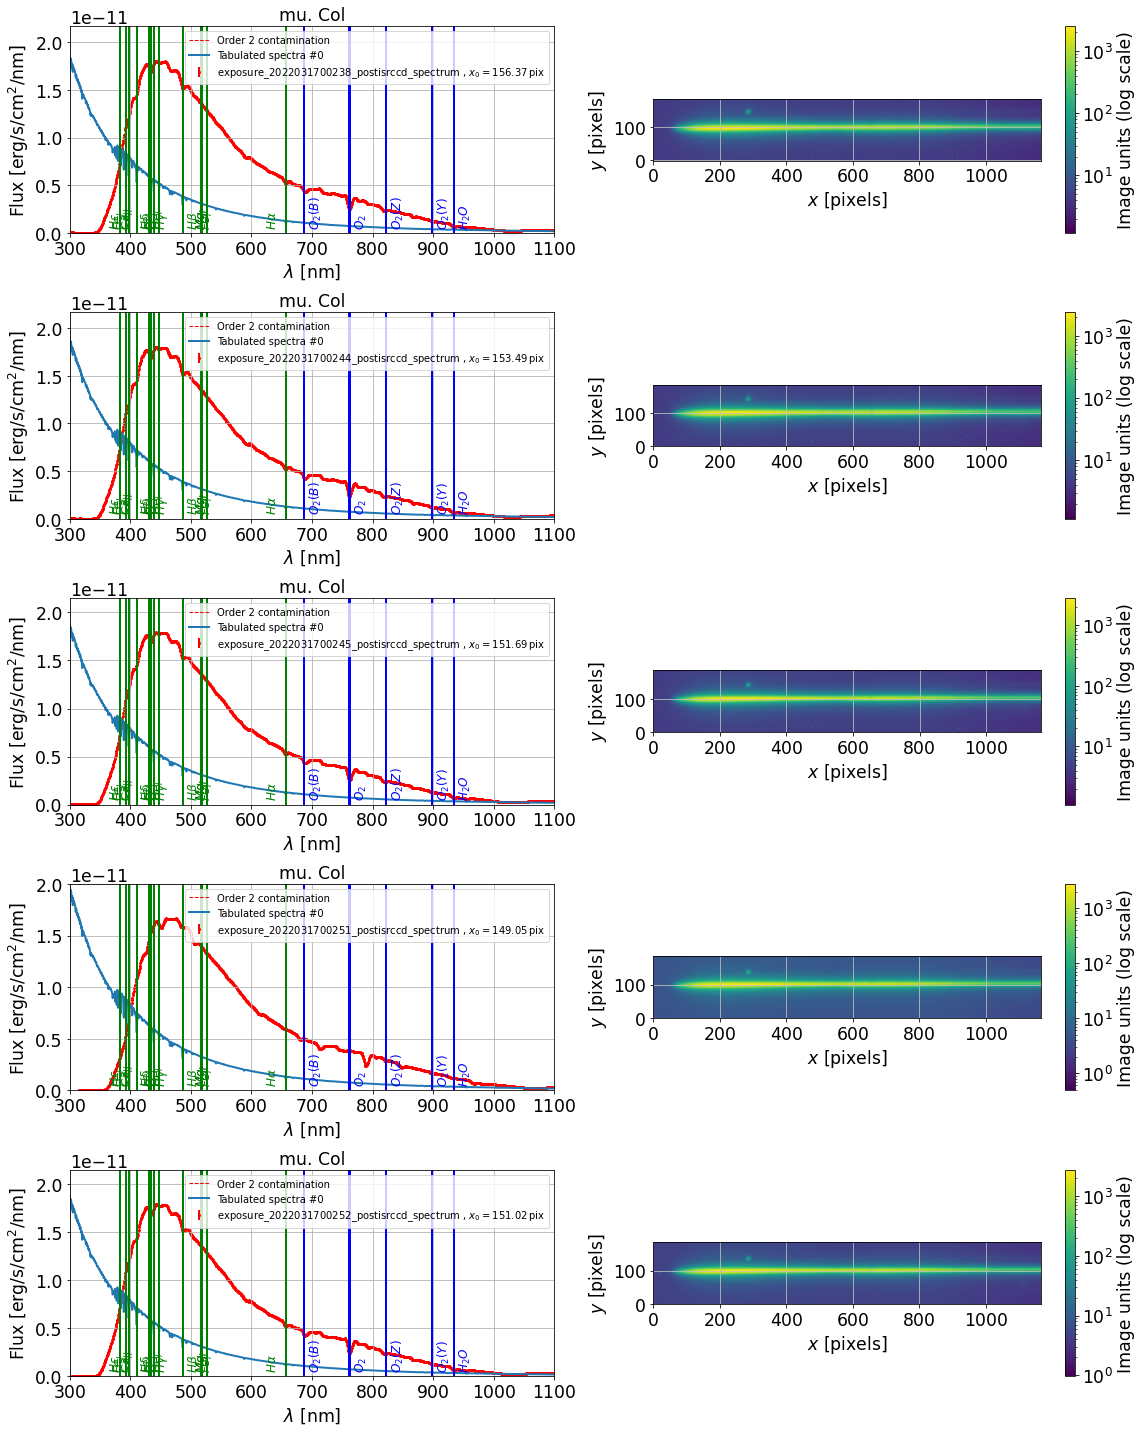

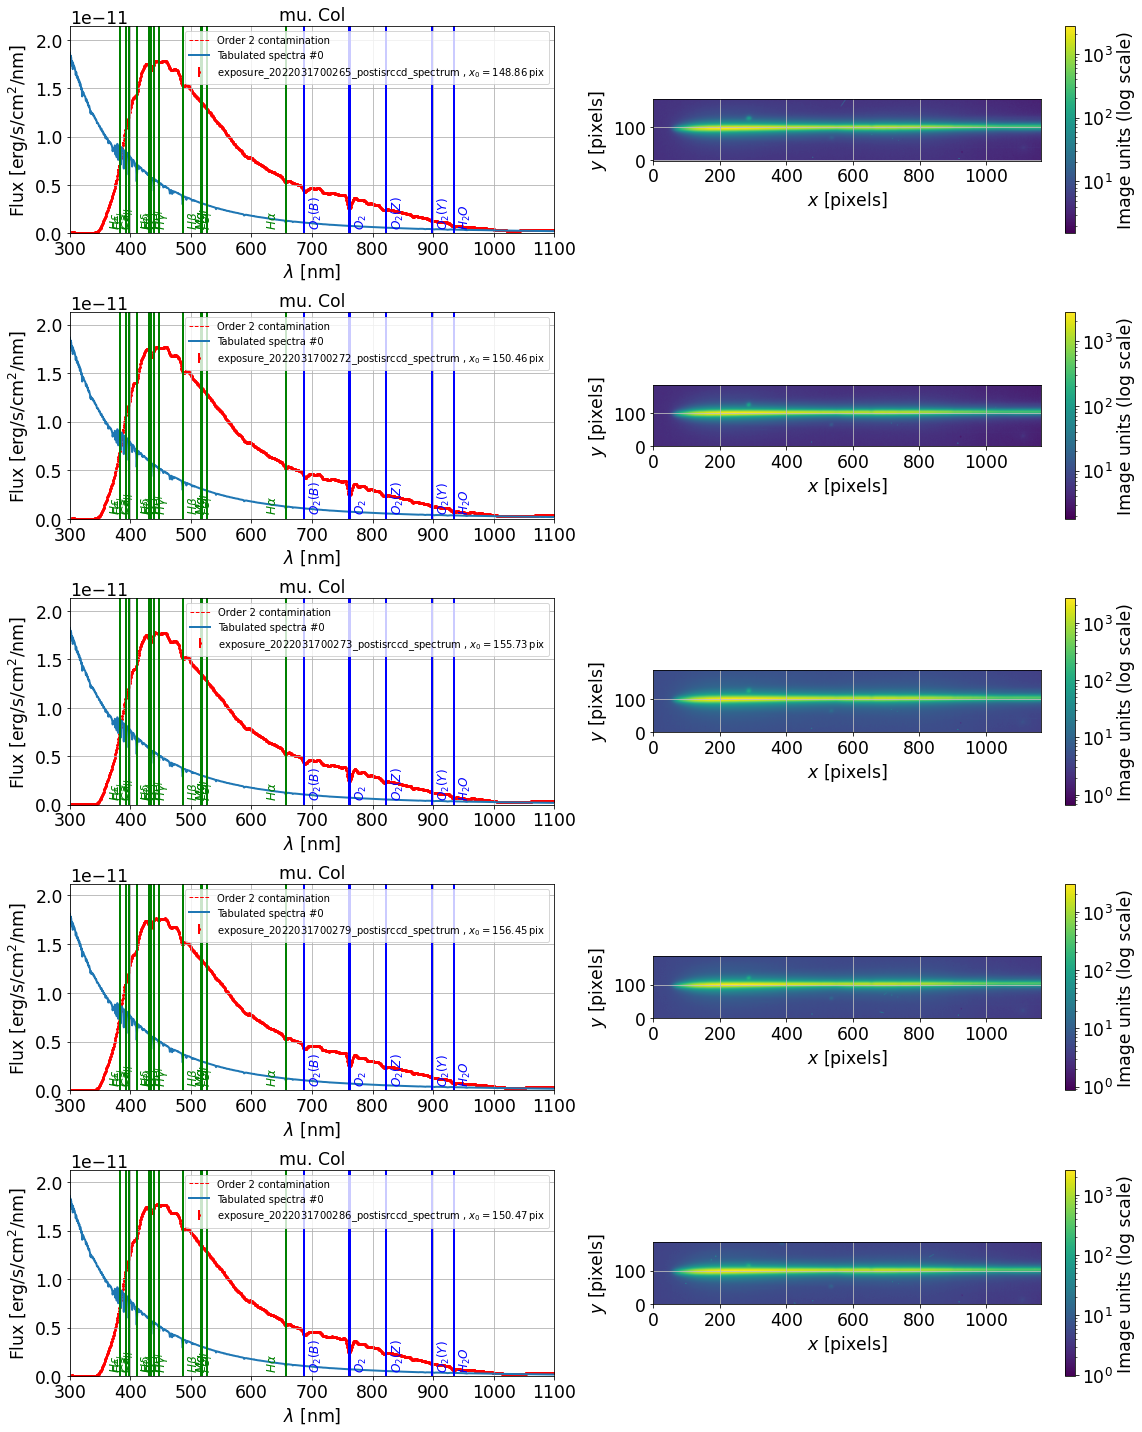

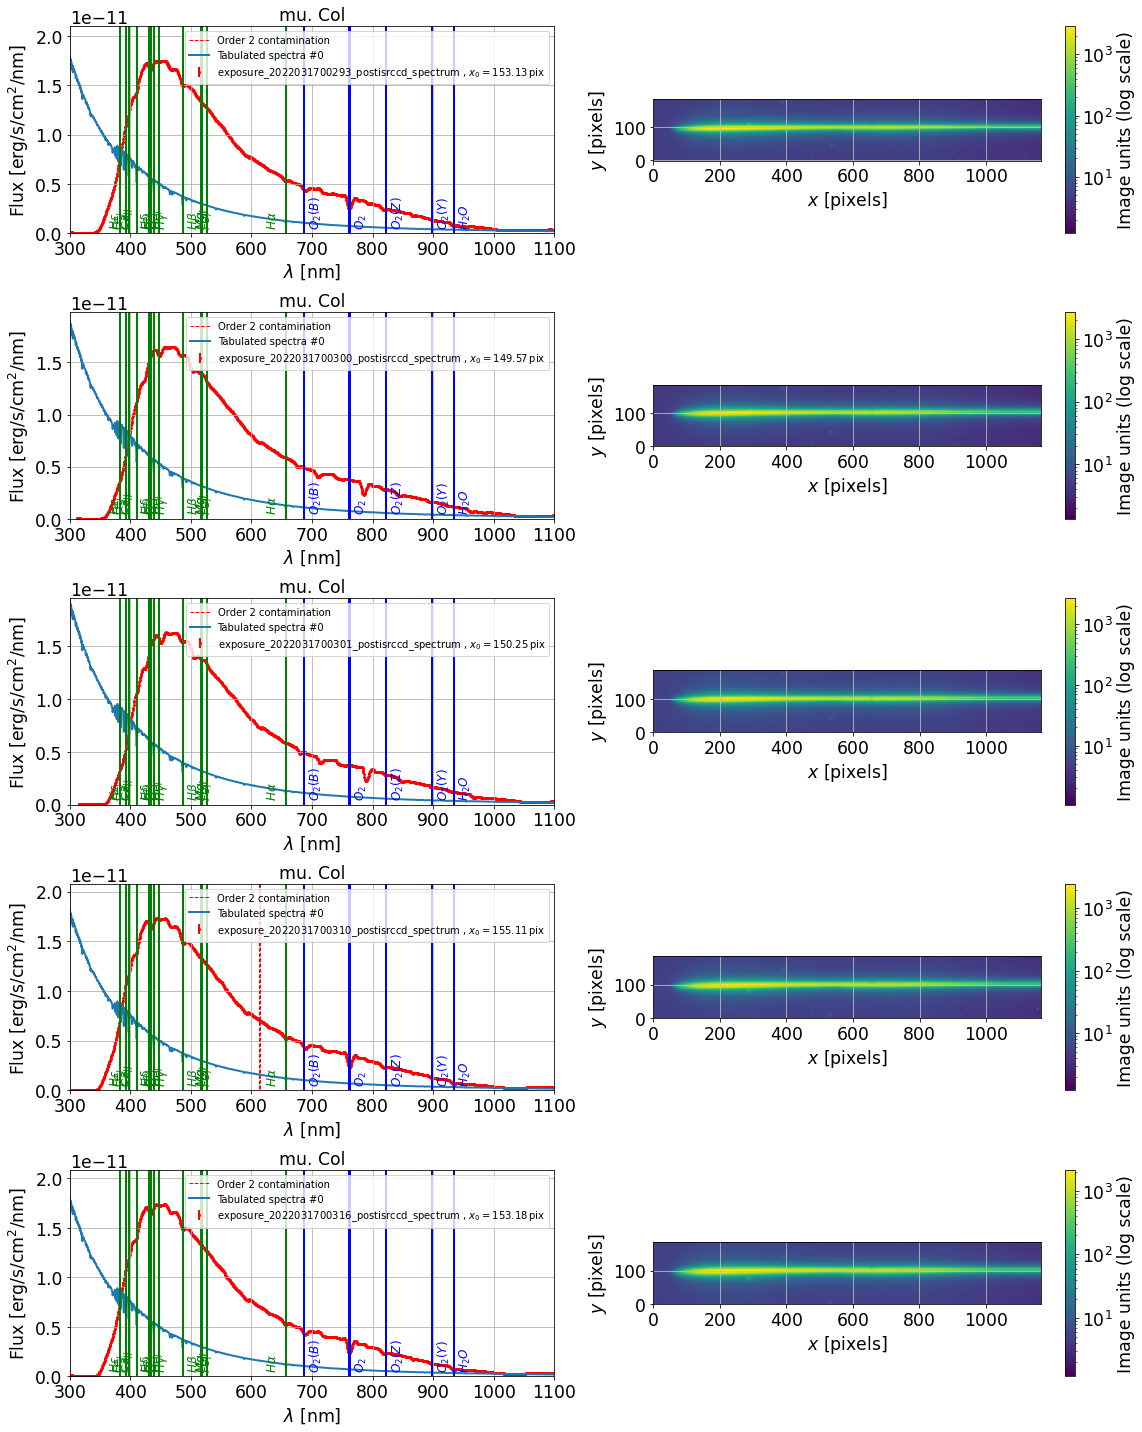

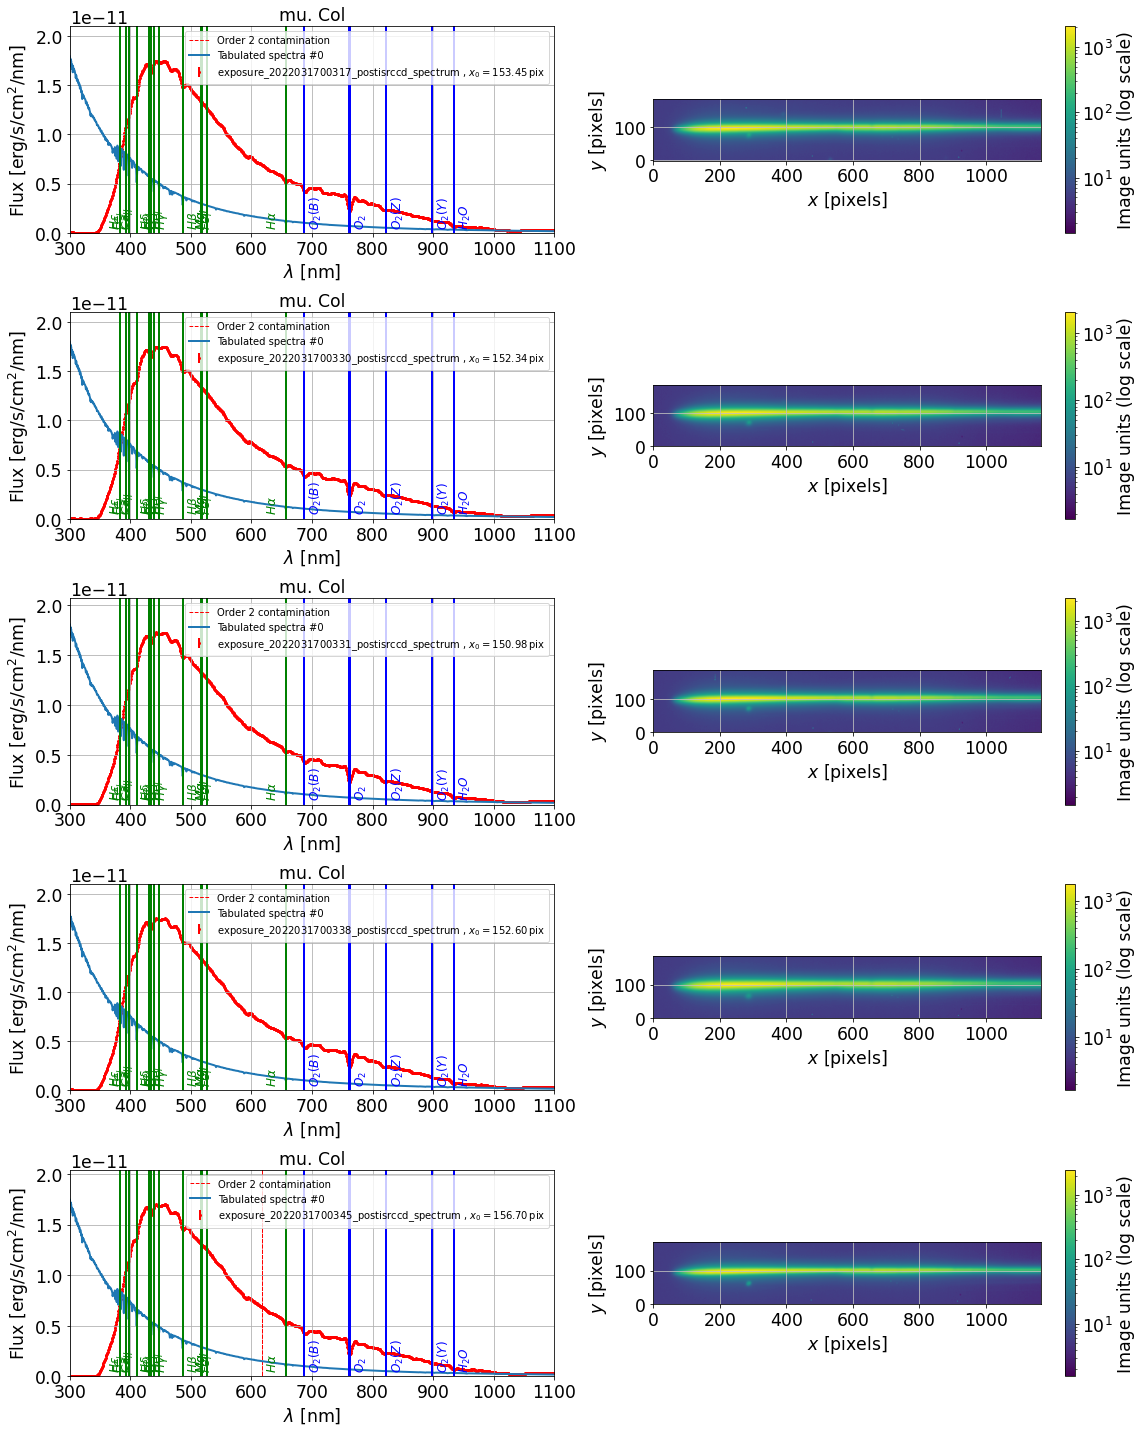

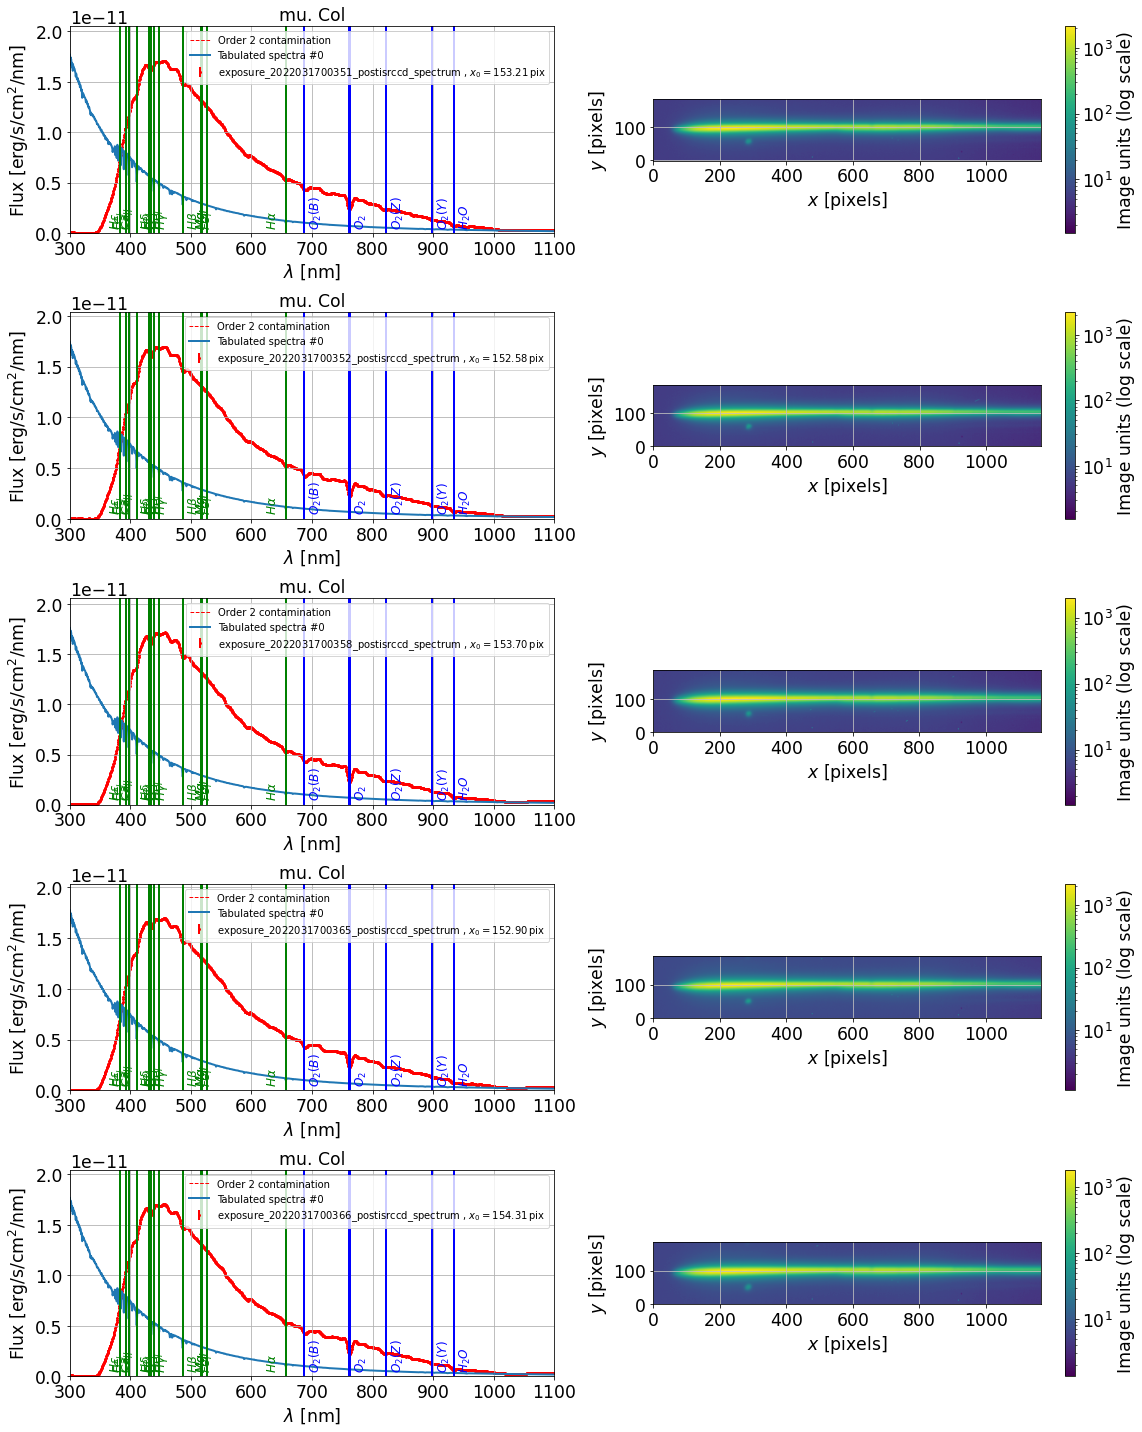

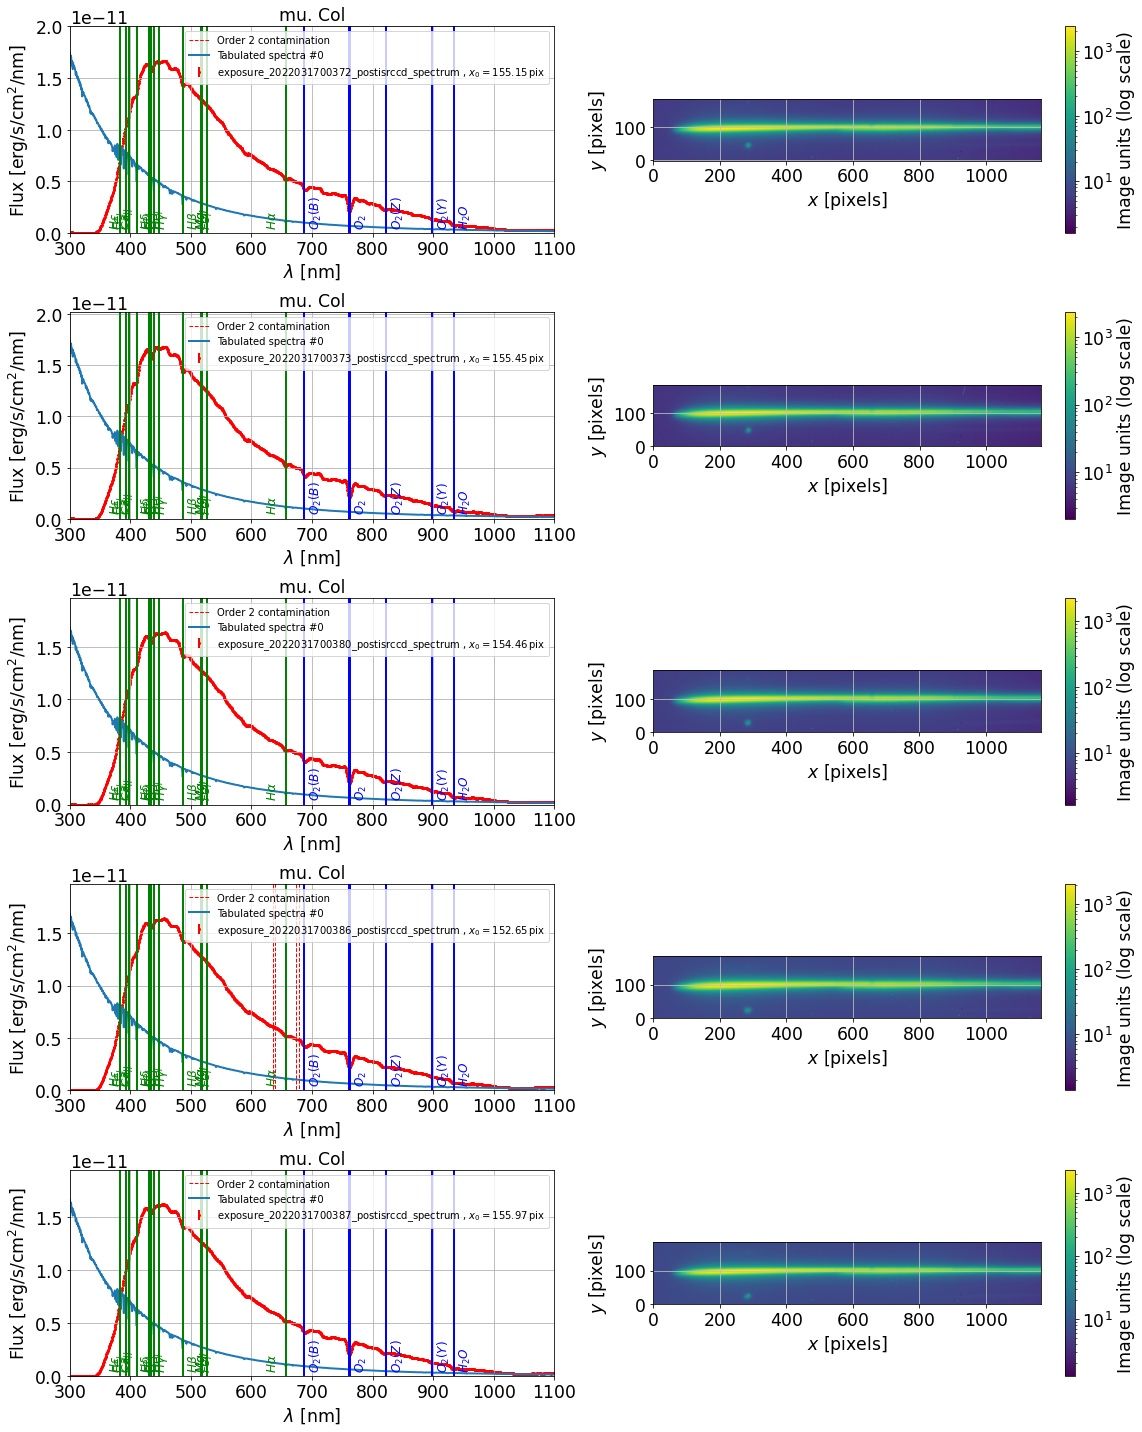

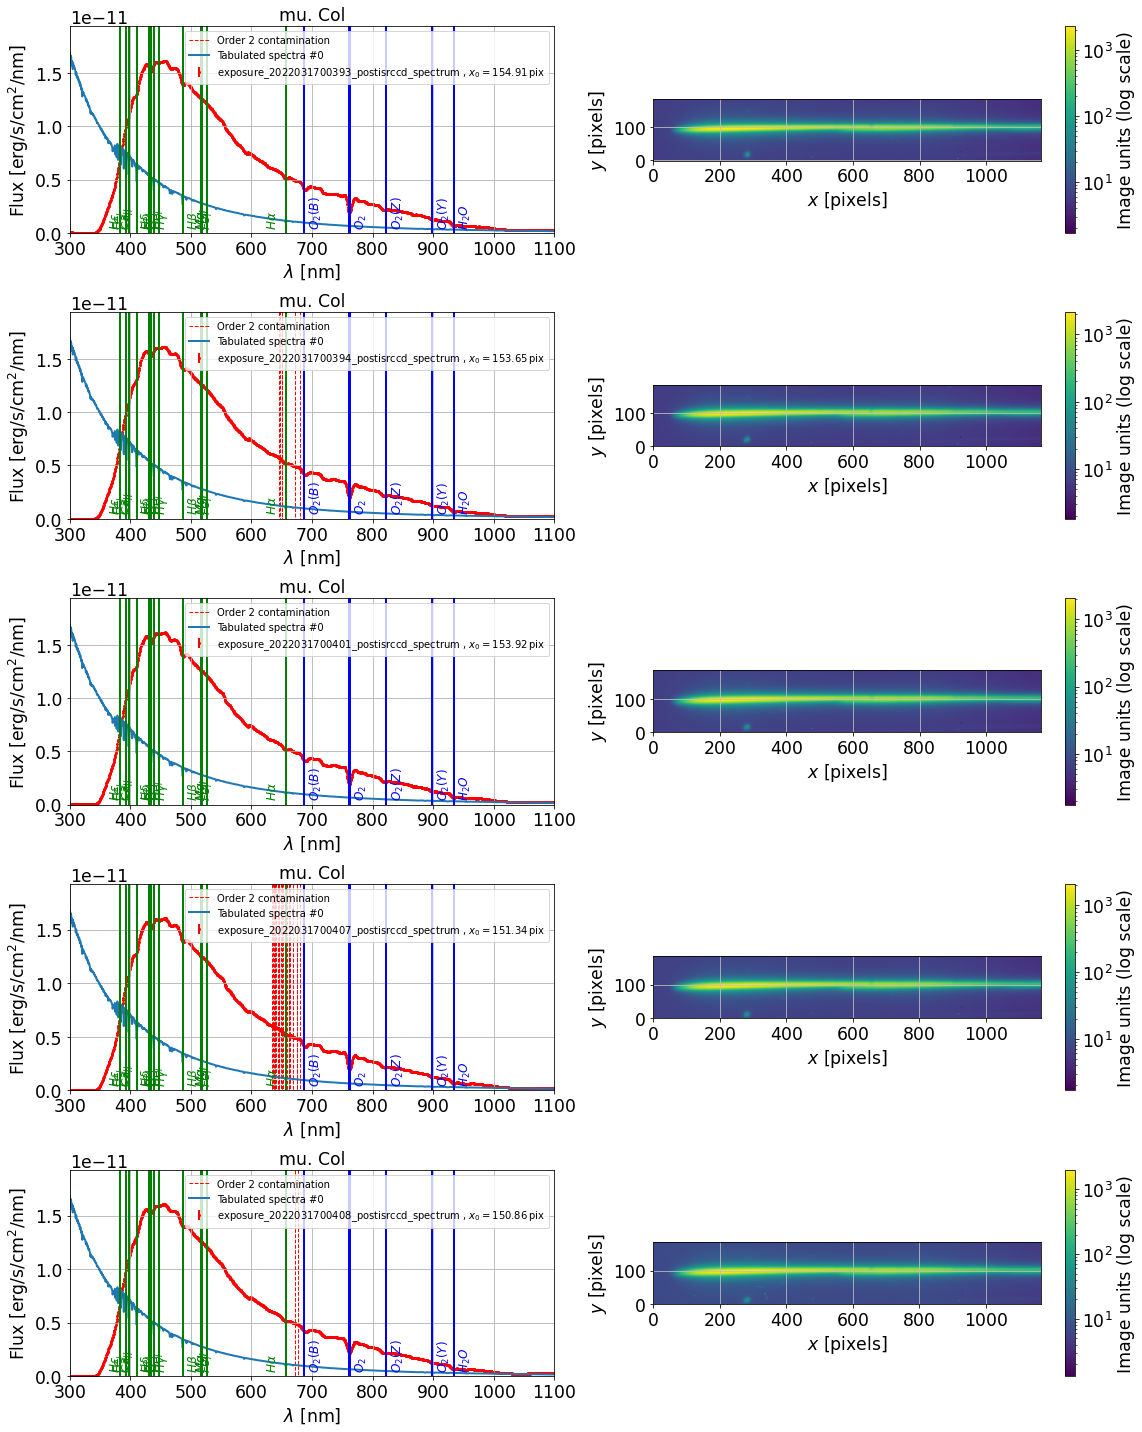

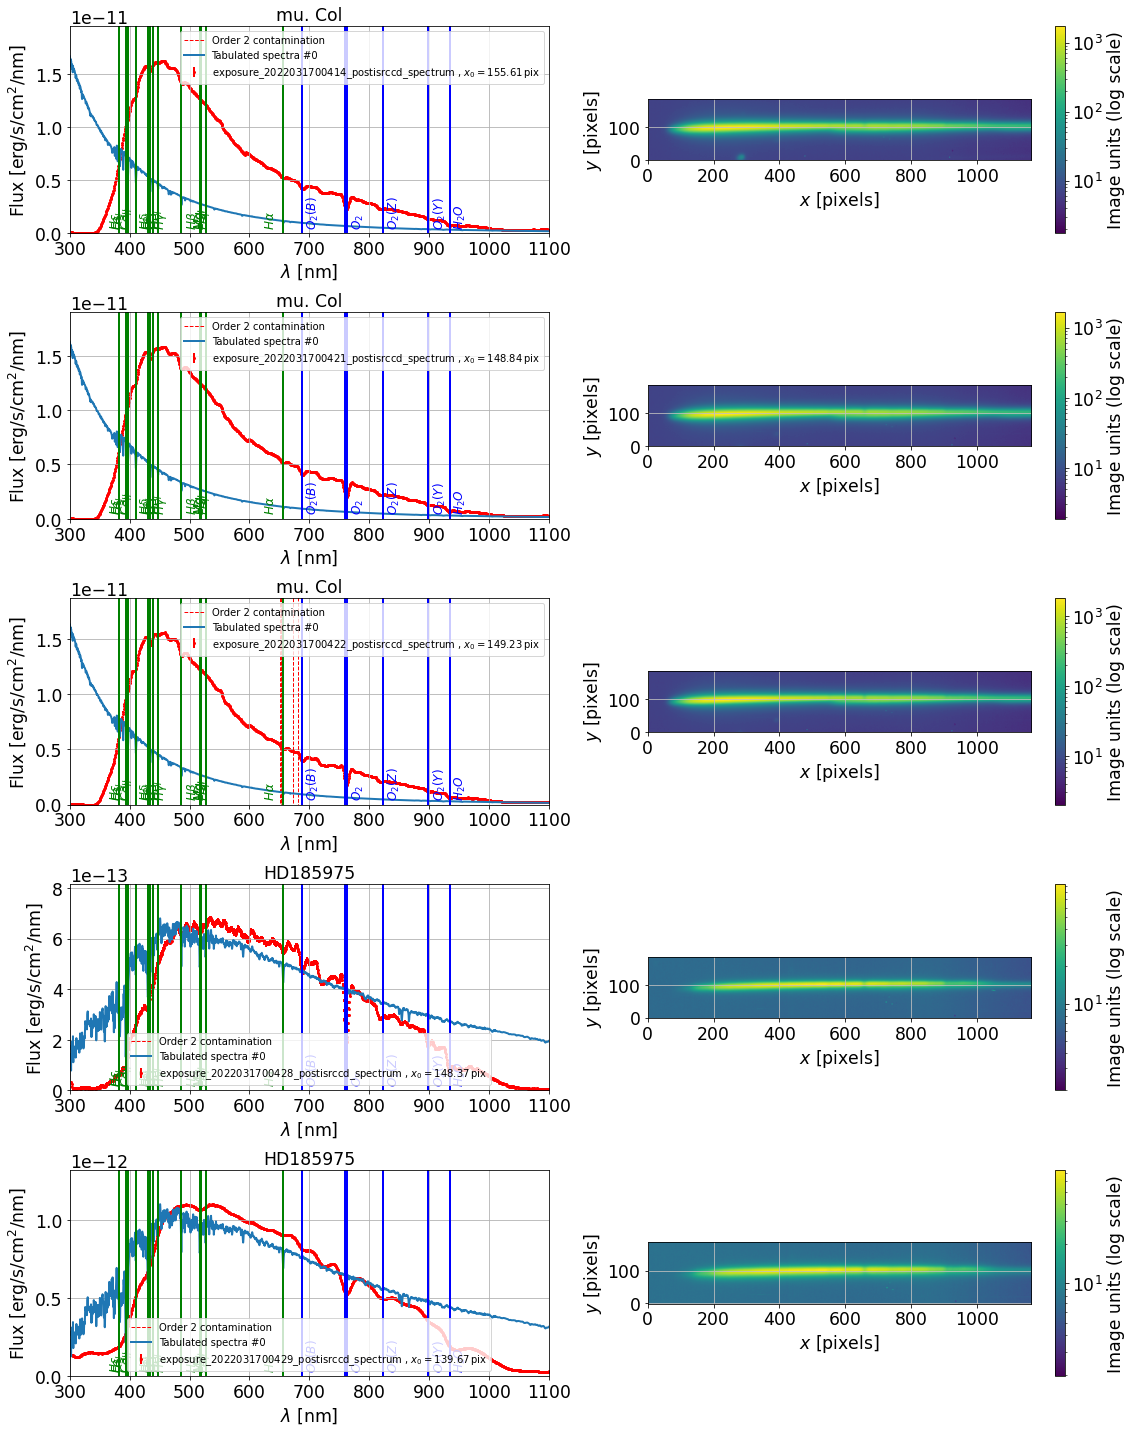

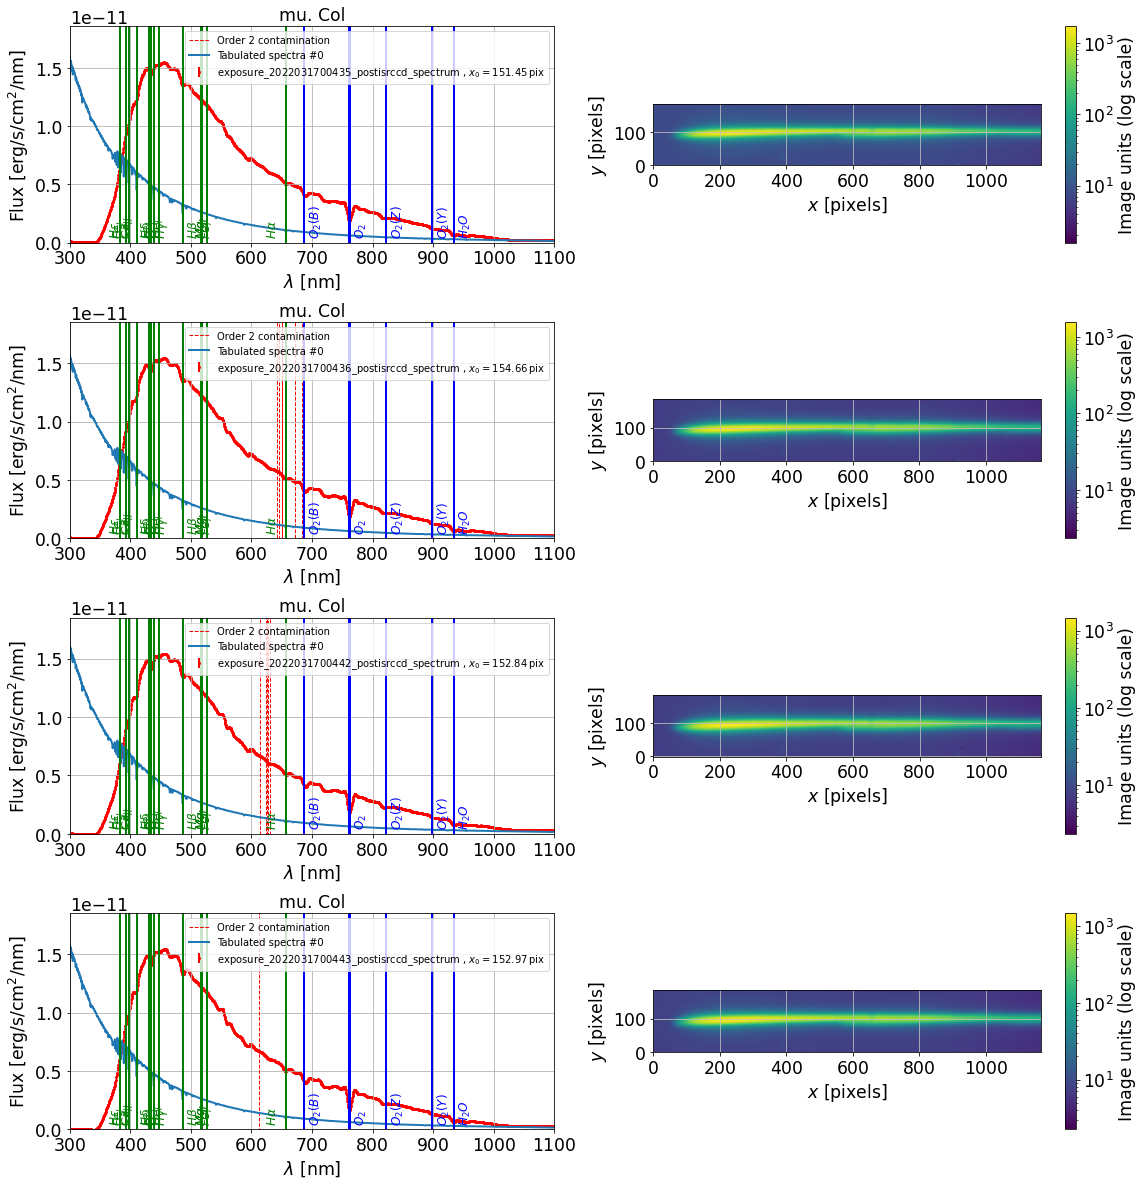

In [52]:
all_figs = SaveFigSpectraInPdf(nbspecperpage=5)

### Summary spectra

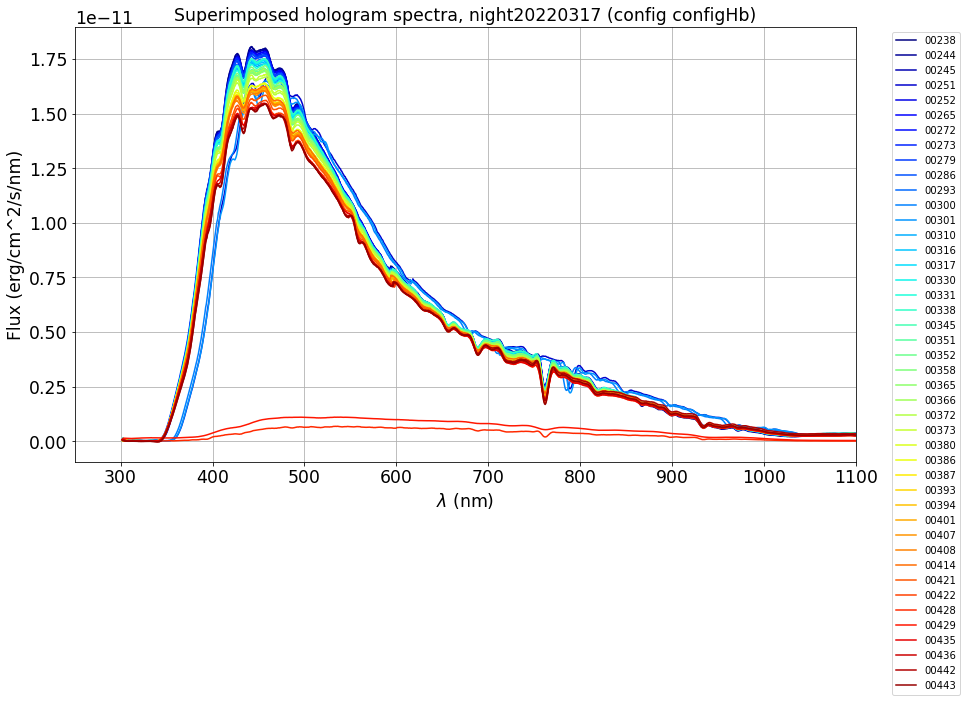

In [53]:
thetitle = f"Superimposed hologram spectra, night{DATE} (config {configdir})"
sumfig = SaveFigSpectraSummaryInPdf(all_lambdas,all_data,all_num,delta=0, thetitle=thetitle)

In [54]:
all_figs.append(sumfig)

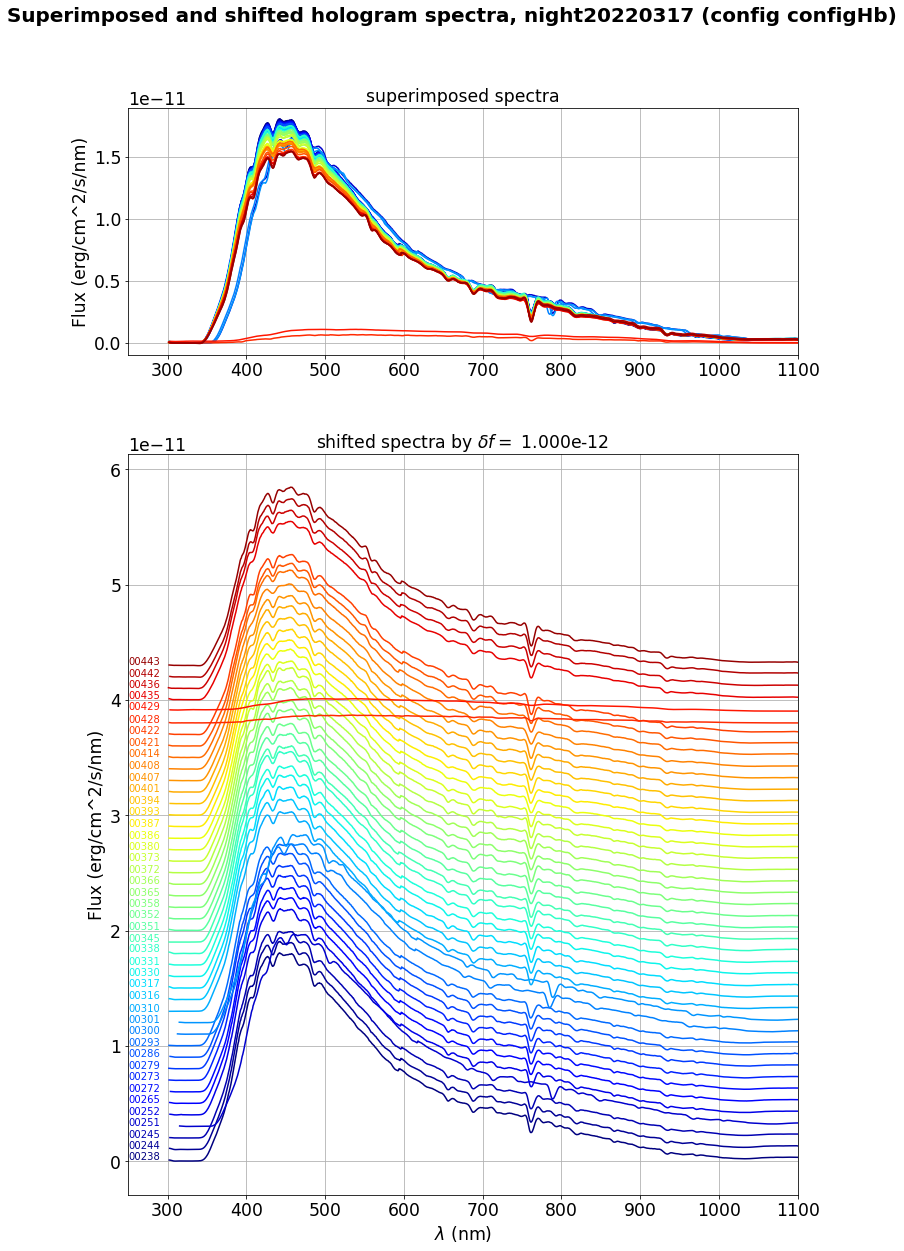

In [55]:
thetitle2 = f"Superimposed and shifted hologram spectra, night{DATE} (config {configdir})"
sumfig2 = SaveFigSpectraSummaryBothInPdf(all_lambdas,all_data,all_num,delta=0.1e-11,thetitle=thetitle2)

In [56]:
all_figs.append(sumfig2)

### Save in pdf file

In [57]:
# Write all images in pdf files

#multipage_pdf_file = f'multipage_pdf_holo_{DATE}_{configdir}.pdf'
# gerate a multipage pdf:
#with PdfPages(multipage_pdf_file) as pdf:
#    for fig in all_figs:
#        pdf.savefig(fig)
#        plt.close()


## View one spectrum

1 ) exposure_2022031700244_postisrccd_spectrum.fits   /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configHb/20220317/2022031700244/basespec/exposure_2022031700244_postisrccd_spectrum.fits
set date_obs to 2022-03-18T00:54:16.312
set expo to 20.0
set airmass to 1.121576965054115
set disperser_label to holo4_003
set units to erg/s/cm$^2$/nm
set rotation_angle to 0.1741806116248446
set dec to -32.3064444444444
set hour_angle to 31.60492174100415
set temperature to 8.9
set pressure to 743.45
set humidity to 49.0
set lambda_ref to 626.883564656571
set parallactic_angle to 94.10618686949074
target_name = mu.col, Selected object name for Simbad : mu. Col
 MAIN_ID        RA           DEC      ... Z_VALUE_89 SCRIPT_NUMBER_ID
             "h:m:s"       "d:m:s"    ...                            
--------- ------------- ------------- ... ---------- ----------------
* mu. Col 05 45 59.8950 -32 18 23.162 ...  0.0003640                1


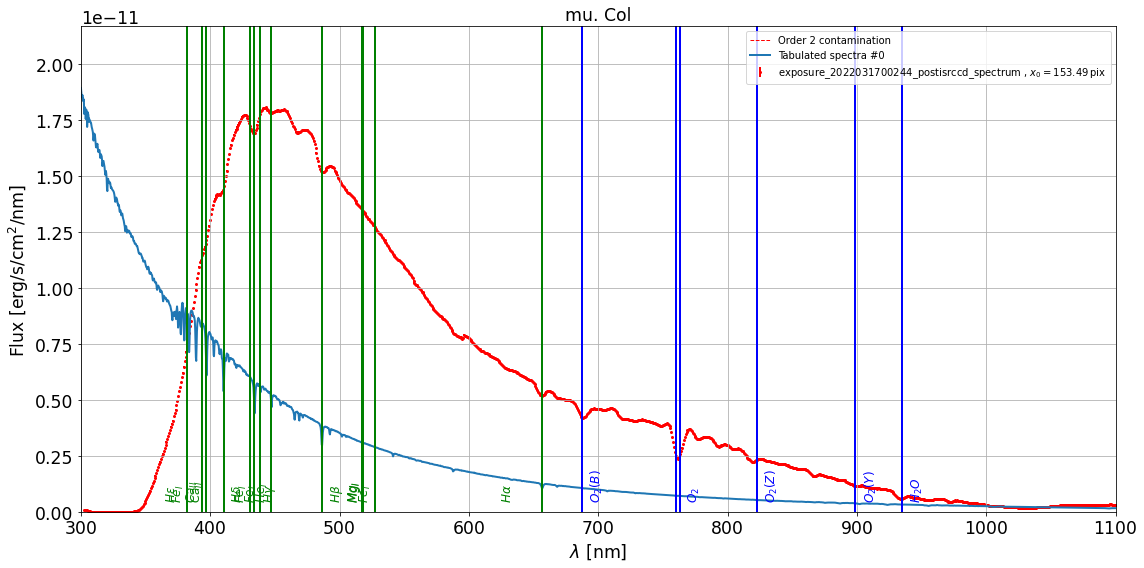

In [58]:
idx=1

fullfilename = all_good_spectra_spectrum_files[idx]
    
filename = os.path.basename(fullfilename)
print(idx,")",filename," ",fullfilename)
    
    
fig=plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1, 1, 1)
    
filename= os.path.basename(fullfilename)
tag=file_tag_forsorting(filename.split(".")[0])
all_num.append(tag)
    
   
     
s=Spectrum(fullfilename, config=config,fast_load=False)
label=filename.split('.')[0]+" "
s.plot_spectrum(ax=ax1,force_lines=True,label=label)
#s.plot_spectrum(ax=ax1,force_lines=True)
ax1.plot(all_lambdas_order2[idx],all_data_order2[idx])
    
    
#ax2 = fig.add_subplot(1, 2, 2)
    
#fullfilename2=all_files_spectrogram[idx]
    
#s.load_spectrogram(fullfilename2)
#s.plot_spectrogram(ax=ax2,scale="log")
    

plt.show()
    

In [59]:
all_figs.append(fig)

## Info

In [60]:
df_infos=pd.DataFrame(infos,columns=["idx","object","date_obs","airmass","temperature","pressure","humidity"])

In [61]:
df_infos.set_index('idx',inplace=True)

In [62]:
all_reftime=[ (Time(tt)-Time( df_infos["date_obs"].values[0])).to_value(u.hr) for tt in df_infos["date_obs"].values ]

In [63]:
all_reftime=np.array(all_reftime)

In [64]:
df_infos["reftime"]=all_reftime

In [65]:
NN = len(df_infos)

In [66]:
df_infos

object                 date_obs   airmass  temperature  pressure  \
idx                                                                       
0     mu. Col  2022-03-18T00:51:22.049  1.115575          8.9    743.45   
1     mu. Col  2022-03-18T00:54:16.312  1.121577          8.9    743.45   
2     mu. Col  2022-03-18T00:54:49.235  1.122727          8.8    743.40   
3     mu. Col  2022-03-18T00:57:47.565  1.129107          8.9    743.40   
4     mu. Col  2022-03-18T00:58:20.709  1.130309          8.9    743.40   
5     mu. Col  2022-03-18T01:04:49.716  1.145030          8.9    743.30   
6     mu. Col  2022-03-18T01:08:18.080  1.153339          8.9    743.30   
7     mu. Col  2022-03-18T01:08:50.992  1.154683          8.9    743.35   
8     mu. Col  2022-03-18T01:11:46.031  1.161939          8.9    743.40   
9     mu. Col  2022-03-18T01:15:18.583  1.171053          8.9    743.45   
10    mu. Col  2022-03-18T01:18:45.526  1.180249          9.0    743.45   
11    mu. Col  2022-03-18T01:22:16.238  1.189962          8.9    743.40   
12    mu. Col  2022-03-18T01:22:49.144  1.191505          9.0    743.45   
13    mu. Col  2022-03-18T01:43:57.837  1.258227          8.8    743.55   
14    mu. Col  2022-03-18T01:46:52.361  1.268584          8.7    743.55   
15    mu. Col  2022-03-18T01:47:25.256  1.270563          8.7    743.55   
16    mu. Col  2022-03-18T01:53:46.736  1.294394          8.6    743.50   
17    mu. Col  2022-03-18T01:54:19.724  1.296523          8.6    743.50   
18    mu. Col  2022-03-18T01:57:49.306  1.310358          8.7    743.45   
19    mu. Col  2022-03-18T02:01:19.196  1.324717          8.6    743.45   
20    mu. Col  2022-03-18T02:04:16.794  1.337275          8.5    743.45   
21    mu. Col  2022-03-18T02:04:49.712  1.339637          8.5    743.35   
22    mu. Col  2022-03-18T02:07:49.074  1.352787          8.4    743.40   
23    mu. Col  2022-03-18T02:11:20.051  1.368766          8.4    743.40   
24    mu. Col  2022-03-18T02:11:53.006  1.371319          8.4    743.45   
25    mu. Col  2022-03-18T02:14:46.798  1.385012          8.4    743.45   
26    mu. Col  2022-03-18T02:15:19.743  1.387650          8.4    743.45   
27    mu. Col  2022-03-18T02:33:33.012  1.484524          8.0    743.35   
28    mu. Col  2022-03-18T02:36:30.874  1.502136          8.1    743.45   
29    mu. Col  2022-03-18T02:37:03.815  1.505457          8.1    743.35   
30    mu. Col  2022-03-18T02:40:00.839  1.523658          8.0    743.40   
31    mu. Col  2022-03-18T02:40:33.787  1.527115          8.0    743.40   
32    mu. Col  2022-03-18T02:44:05.105  1.549764          8.0    743.45   
33    mu. Col  2022-03-18T02:47:02.835  1.569520          8.0    743.40   
34    mu. Col  2022-03-18T02:47:35.769  1.573248          8.0    743.45   
35    mu. Col  2022-03-18T02:50:38.306  1.594345          8.0    743.45   
36    mu. Col  2022-03-18T03:08:41.573  1.735941          7.7    743.50   
37    mu. Col  2022-03-18T03:09:14.484  1.740715          7.7    743.50   
38   HD185975  2022-03-18T03:12:54.310  2.129246          7.8    743.50   
39   HD185975  2022-03-18T03:13:27.208  2.129068          7.8    743.50   
40    mu. Col  2022-03-18T03:17:06.794  1.813094          7.7    743.45   
41    mu. Col  2022-03-18T03:17:39.779  1.818418          7.7    743.40   
42    mu. Col  2022-03-18T03:21:26.873  1.856070          7.8    743.40   
43    mu. Col  2022-03-18T03:21:59.878  1.861692          7.7    743.45   

     humidity   reftime  
idx                      
0        48.0  0.000000  
1        49.0  0.048406  
2        49.0  0.057552  
3        50.0  0.107088  
4        50.0  0.116294  
5        53.0  0.224352  
6        51.0  0.282231  
7        51.0  0.291373  
8        53.0  0.339995  
9        54.0  0.399037  
10       53.0  0.456521  
11       56.0  0.515053  
12       56.0  0.524193  
13       56.0  0.876608  
14       56.0  0.925087  
15       56.0  0.934224  
16       56.0  1.040191  
17       56.0  1.049354  
18       57.0  1.107571  
19       5

In [67]:
summary_file = f"summaryspectra_{DATE}_{configdir}.csv"
df_infos.to_csv(summary_file)

Text(0.5, 1.0, 'airmassvs vs date')

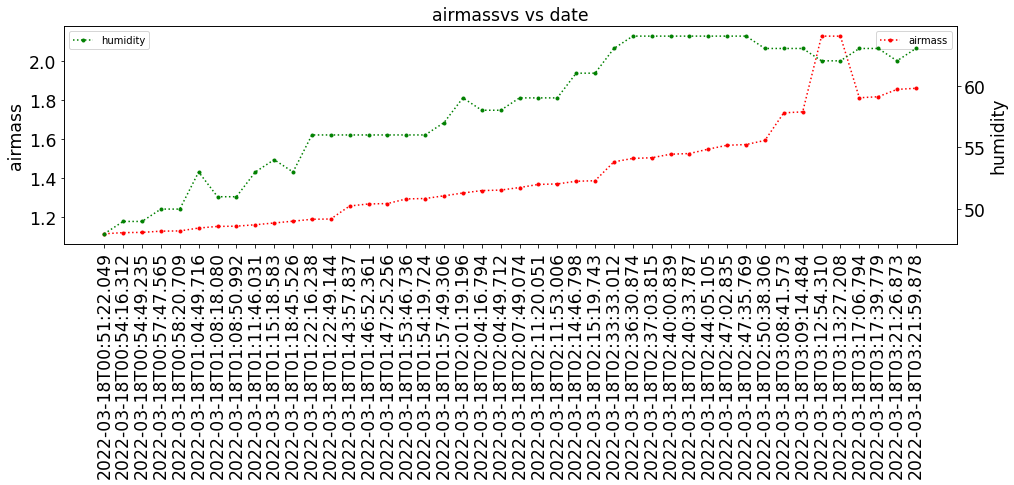

In [68]:
fig=plt.figure(figsize=(16,4))
#plt.xticks(rotation=90)
ax = fig.add_subplot(1, 1, 1)
ax.plot(df_infos['date_obs'], df_infos['airmass'],linestyle='dotted', marker='.',color="red",label="airmass")
#ax.set_xticks(rotation='vertical');
ax.xaxis.set_tick_params(rotation=90)
ax.set_ylabel("airmass")
ax.legend(loc="upper right")

ax2 = ax.twinx()
ax2.plot(df_infos['date_obs'], df_infos['humidity'],linestyle='dotted', marker='.',color="green",label="humidity")
ax2.set_ylabel("humidity")
ax2.legend(loc="upper left")
ax.set_title("airmassvs vs date")

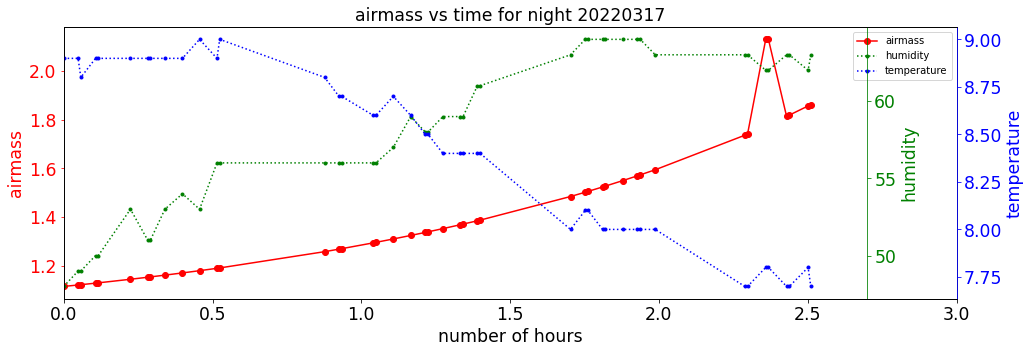

In [69]:
fig=plt.figure(figsize=(16,5))
#plt.xticks(rotation=90)
ax = fig.add_subplot(1, 1, 1)
p1,= ax.plot(df_infos['reftime'], df_infos['airmass'],marker="o",color="red",label="airmass")
#ax.set_xticks(rotation='vertical');
#ax.xaxis.set_tick_params(rotation=90)
ax.set_xlabel("number of hours")
ax.set_xlim(0,np.ceil(df_infos['reftime'].values.max()))
ax.set_ylabel("airmass")
ax2 = ax.twinx()
p2, = ax2.plot(df_infos['reftime'], df_infos['humidity'],linestyle='dotted', marker='.',color="green",label="humidity")
ax2.set_ylabel("humidity")
ax2.spines["right"].set_position(("axes", 0.9))

ax3 = ax.twinx()

ax3.spines["right"].set_position(("axes", 1.0))
p3, = ax3.plot(df_infos['reftime'], df_infos['temperature'],linestyle='dotted', marker='.',color="blue",label="temperature")
ax3.set_ylabel("temperature")

curves = [p1, p2, p3]
ax.legend(curves, [c.get_label() for c in curves])

ax.set_title(f"airmass vs time for night {DATE}")

ax.yaxis.label.set_color(p1.get_color())
ax2.yaxis.label.set_color(p2.get_color())
ax3.yaxis.label.set_color(p3.get_color())

ax2.spines["right"].set_edgecolor(p2.get_color())
ax3.spines["right"].set_edgecolor(p3.get_color())

ax.tick_params(axis='y', colors=p1.get_color())
ax2.tick_params(axis='y', colors=p2.get_color())
ax3.tick_params(axis='y', colors=p3.get_color())
plt.show()


In [70]:
all_figs.append(fig)

# Header info

In [71]:
NN=len(all_good_spectra_spectrum_files)

all_rebin=np.zeros(NN)
all_targetx=np.zeros(NN)
all_targety=np.zeros(NN)
all_rotangle=np.zeros(NN)
all_d2ccd=np.zeros(NN)
all_pixshift=np.zeros(NN)
all_chi2_fit=np.zeros(NN)
all_a2_fit=np.zeros(NN)
all_lbda_ref=np.zeros(NN)
all_tagnumber=np.zeros(NN)


for idx in range(NN):
    
    fullfilename=all_good_spectra_spectrum_files[idx]
    
    filename= os.path.basename(fullfilename)
    hdul=fits.open(fullfilename)
    header=hdul[0].header
    tagnum=str(all_num[idx])
    
    #ROTANGLE=  -0.1367006901184345 / [deg] angle of the dispersion axis             
    #D2CCD   =    179.6778868175837 / [mm] distance between disperser and CCD        
    #TARGETX =    315.9547462941386 / target position on X axis                      
    #TARGETY =    75.06785960446246 / target position on Y axis                      
    #LBDA_REF=    634.9155139280113                                                  
    #PIXSHIFT=  -0.9996981508176748                                                  
    #CHI2_FIT=    1.602115867259752                                                  
    #A2_FIT  =                  1.0                                                  
    #REBIN   =                    2 / original image rebinning factor to get spectrum
    
    rebin=header["REBIN"]
    targetx=header["TARGETX"]*rebin
    targety=header["TARGETY"]*rebin
    rotangle=header["ROTANGLE"]
    d2ccd=header["D2CCD"]
    pixshift=header["PIXSHIFT"]
    chi2_fit=header["CHI2_FIT"]
    a2_fit=header["A2_FIT"]
    lbda_ref=header["LBDA_REF"]
    
    
    all_rebin[idx]=rebin
    all_targetx[idx]=targetx
    all_targety[idx]=targety
    all_rotangle[idx]=rotangle
    all_d2ccd[idx]=d2ccd
    all_pixshift[idx]=pixshift
    all_chi2_fit[idx]=chi2_fit
    all_a2_fit[idx]=a2_fit
    all_lbda_ref[idx]=lbda_ref
    all_tagnumber[idx]=tagnum
    

In [72]:
header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 1165                                                  
NAXIS2  =                    3                                                  
EXTEND  =                    T                                                  
ORIGIN  = 'LSST DM Header Service'                                              
TIMESYS = 'TAI     '                                                            
DATE    = '2022-03-18T03:21:59.878'                                             
DATE-OBS= '2022-03-18T03:21:59.878'                                             
DATE-BEG= '2022-03-18T03:22:14.022'                                             
DATE-END= '2022-03-18T03:22:34.256'                                             
MJD     =     59656.14027636

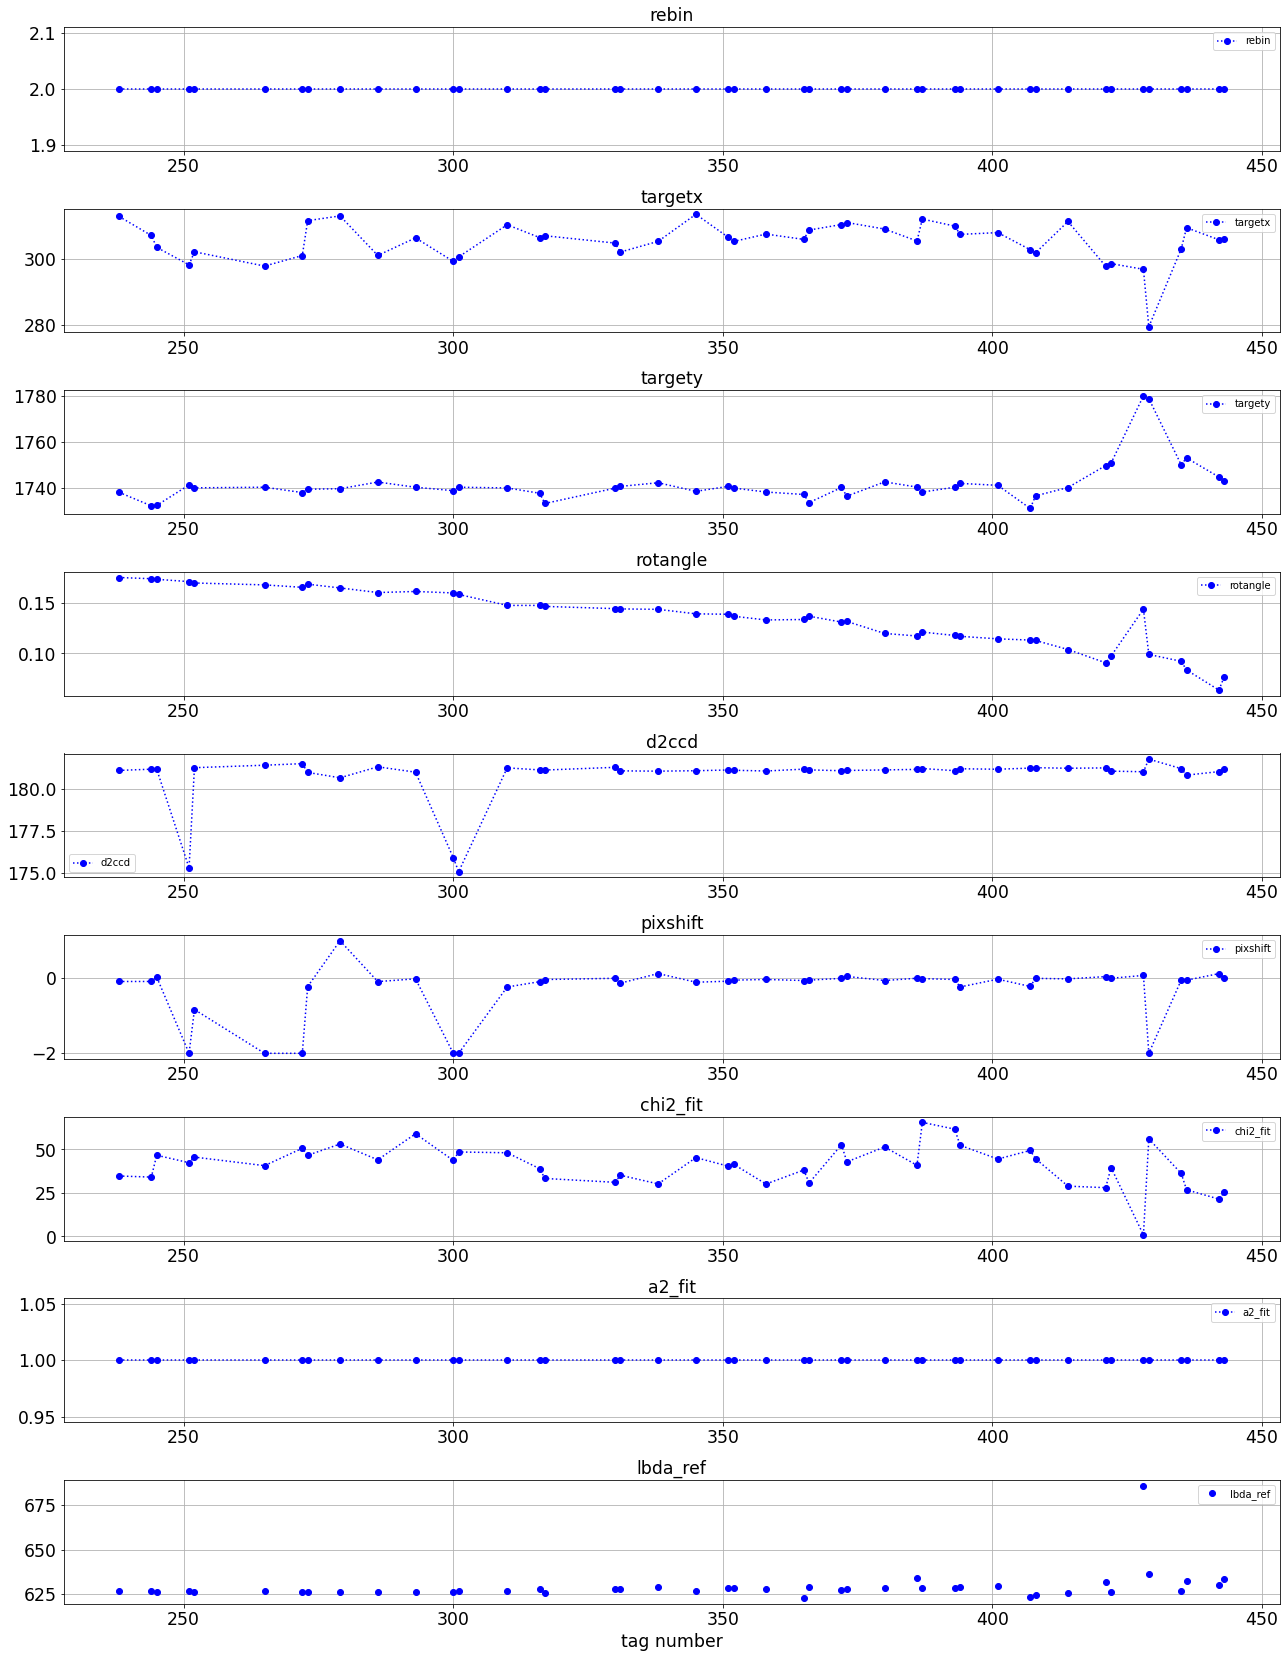

In [73]:
fig=plt.figure(figsize=(18,25))

# rebin
ax=fig.add_subplot(10,1,1)
ax.plot(all_tagnumber,all_rebin,"b:o",label="rebin")
ax.legend()
ax.grid()
ax.set_title("rebin")

#targetx
ax=fig.add_subplot(10,1,2)
ax.plot(all_tagnumber,all_targetx,"b:o",label="targetx")
ax.legend()
ax.grid()
ax.set_title("targetx")



#targety
ax=fig.add_subplot(10,1,3)
ax.plot(all_tagnumber,all_targety,"b:o",label="targety")
ax.legend()
ax.grid()
ax.set_title("targety")



#rotangle
ax=fig.add_subplot(10,1,4)
ax.plot(all_tagnumber,all_rotangle,"b:o",label="rotangle")
ax.legend()
ax.grid()
ax.set_title("rotangle")

#d2ccd
ax=fig.add_subplot(10,1,5)
ax.plot(all_tagnumber,all_d2ccd,"b:o",label="d2ccd")
ax.legend()
ax.grid()
ax.set_title("d2ccd")


#pixshift
ax=fig.add_subplot(10,1,6)
ax.plot(all_tagnumber,all_pixshift,"b:o",label="pixshift")
ax.legend()
ax.grid()
ax.set_title("pixshift")


#chi2_fit
ax=fig.add_subplot(10,1,7)
ax.plot(all_tagnumber,all_chi2_fit,"b:o",label="chi2_fit")
ax.legend()
ax.grid()
ax.set_title("chi2_fit")

#a2_fit
ax=fig.add_subplot(10,1,8)
ax.plot(all_tagnumber,all_a2_fit,"b:o",label="a2_fit")
ax.legend()
ax.grid()
ax.set_title("a2_fit")


#all_lbda_ref
ax=fig.add_subplot(10,1,9)
ax.plot(all_tagnumber,all_lbda_ref,"bo",label="lbda_ref")
ax.legend()
ax.grid()
ax.set_title("lbda_ref")

ax.set_xlabel("tag number")
plt.tight_layout()
plt.show()


In [74]:
all_figs.append(fig)

# Write in pdf file

In [75]:
# Write all images in pdf files
multipage_pdf_file = f'multipage_pdf_holo_{DATE}_{configdir}.pdf'
# gerate a multipage pdf:
with PdfPages(multipage_pdf_file) as pdf:
    for fig in all_figs:
        pdf.savefig(fig)
        plt.close()

# write in pickles files

In [77]:
df_infos.head()

object                 date_obs   airmass  temperature  pressure  \
idx                                                                      
0    mu. Col  2022-03-18T00:51:22.049  1.115575          8.9    743.45   
1    mu. Col  2022-03-18T00:54:16.312  1.121577          8.9    743.45   
2    mu. Col  2022-03-18T00:54:49.235  1.122727          8.8    743.40   
3    mu. Col  2022-03-18T00:57:47.565  1.129107          8.9    743.40   
4    mu. Col  2022-03-18T00:58:20.709  1.130309          8.9    743.40   

     humidity   reftime  
idx                      
0        48.0  0.000000  
1        49.0  0.048406  
2        49.0  0.057552  
3        50.0  0.107088  
4        50.0  0.116294

In [85]:
df_infos.iloc[idx]['object']

'mu. Col'

In [88]:
all_out_data = {}

for idx in range(NN):
    if FLAG_ORDER2:
        thedata = {'number':all_tagnumber[idx],
               'object':df_infos.iloc[idx]['object'],
               'dateobs':df_infos.iloc[idx]['date_obs'],
               'refhour':df_infos.iloc[idx]['reftime'],
               'airmass':df_infos.iloc[idx]['airmass'], 
               'pressure':df_infos.iloc[idx]['pressure'], 
               'temperature':df_infos.iloc[idx]['temperature'], 
               'humidity':df_infos.iloc[idx]['humidity'], 
               'targetx_pix':all_targetx[idx],
               'targety_pix':all_targety[idx],
               'rotangle':all_rotangle[idx],
               'd2ccd':all_d2ccd[idx],
               'all_lambdas':all_lambdas[idx],
               'all_fluxes':all_data[idx],
               'all_fluxes_err':all_data_err[idx],
               'all_lambdas_order2':all_lambdas_order2[idx],
               'all_fluxes_order2':all_data_order2[idx],
               'all_fluxes_err_order2':all_data_err_order2[idx],
              }
    else:
        thedata = {'number':all_tagnumber[idx],
               'object':df_infos.iloc[idx]['object'],
               'dateobs':df_infos.iloc[idx]['date_obs'],
               'refhour':df_infos.iloc[idx]['reftime'],
               'airmass':df_infos.iloc[idx]['airmass'],
               'pressure':df_infos.iloc[idx]['pressure'], 
               'temperature':df_infos.iloc[idx]['temperature'], 
               'humidity':df_infos.iloc[idx]['humidity'], 
               'targetx_pix':all_targetx[idx],
               'targety_pix':all_targety[idx],
               'rotangle':all_rotangle[idx],
               'd2ccd':all_d2ccd[idx],
               'all_lambdas':all_lambdas[idx],
               'all_fluxes':all_data[idx],
               'all_fluxes_err':all_data_err[idx],
            }         
            
    all_out_data[os.path.basename(all_good_spectra_spectrum_files[idx])]=thedata


In [89]:
pkl_outfilename=f'run-auxtel-holo-{DATE}-{configdir}.pickle'

with open(pkl_outfilename, 'wb') as pickle_file:
    pickle.dump(all_out_data,pickle_file)


In [90]:
pkl_infilename=pkl_outfilename

In [91]:
with open(pkl_infilename, 'rb') as pickle_file:
    content = pickle.load(pickle_file)


In [ ]:
#content

In [92]:
# Get first value of dictionary
next(iter(content.items()))

('exposure_2022031700238_postisrccd_spectrum.fits',
 {'number': 238.0,
  'object': 'mu. Col',
  'dateobs': '2022-03-18T00:51:22.049',
  'refhour': 0.0,
  'airmass': 1.11557476948966,
  'pressure': 743.45,
  'temperature': 8.9,
  'humidity': 48.0,
  'targetx_pix': 312.7442668572934,
  'targety_pix': 1738.0006619324693,
  'rotangle': 0.1753951396614214,
  'd2ccd': 181.0974436798836,
  'all_lambdas': array([ 302.20970512,  302.91544585,  303.62117594, ..., 1108.67461764,
         1109.35162338, 1110.02859124]),
  'all_fluxes': array([1.04110833e-13, 9.83856109e-14, 8.99209206e-14, ...,
         5.34113538e-13, 5.36905940e-13, 5.53127394e-13]),
  'all_fluxes_err': array([3.51303583e-15, 3.10100695e-15, 2.58677333e-15, ...,
         3.34568263e-15, 4.01784054e-15, 4.54242555e-15]),
  'all_lambdas_order2': array([ 302.24857475,  302.9543149 ,  303.66004442, ..., 1108.71192607,
         1109.38892974, 1110.06589555]),
  'all_fluxes_order2': array([420.23653349, 386.95227531, 344.90384603, ...